# Lógica de Código Pyplan

### Pacotes

In [5]:
import os as os
import numpy as np
import pandas as pd
import xarray as xr

#### Valor Percentual

In [4]:
# Valor Percentual = (Atual - Anterior)/Anterior 
atual = 30000
anterior = 50000
valor_percentual = ((atual - anterior)/anterior) * 100
str(valor_percentual) + ' %'

'-40.0 %'

#### Defininindo um Index com Compreensão de lista (List comprehension)

In [5]:
data  = {'Coluna1':['Regional1', 'Regional2'],  'Coluna2':['Região Leste', 'Região Norte'], 'Coluna3':['Atacado', 'Varejo'], 'vol_dia':[10000, 10]}
_df = pd.DataFrame(data)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional1,Região Leste,Atacado,10000
1,Regional2,Região Norte,Varejo,10


In [6]:
_df.set_index(['Coluna1', 'Coluna2', 'Coluna3', 'vol_dia'])

,,,
Coluna1,Coluna2,Coluna3,vol_dia
Regional1,Região Leste,Atacado,10000
Regional2,Região Norte,Varejo,10


In [7]:
_df.set_index([col for col in _df if col != 'vol_dia'])

,,,vol_dia
Coluna1,Coluna2,Coluna3,
Regional1,Região Leste,Atacado,10000
Regional2,Região Norte,Varejo,10


#### Deletando Colunas 

In [8]:
data = {'col1':[1,2], 'col2':[1,2], 'col3':[1,2]}
_df = pd.DataFrame(data)
_df

,col1,col2,col3
0,1,1,1
1,2,2,2


In [9]:
_df = _df.drop(columns=['col3'])
_df

,col1,col2
0,1,1
1,2,2


In [10]:
del _df['col2']
_df

,col1
0,1
1,2


In [11]:
_df.insert(loc=1, column='MesTime', value=['2021.01','2021.02'])
_df

,col1,MesTime
0,1,2021.01
1,2,2021.02


In [12]:
_datas = {'2021.01':'jan', '2021.02':'fev'}
_df = _df.replace({'MesTime':_datas})
_df

,col1,MesTime
0,1,jan
1,2,fev


#### Filtros

In [13]:
_df[ (_df['col1']==1) & (_df['MesTime']=='jan') ]

,col1,MesTime
0,1,jan


In [14]:
_list = ['fev']
_df[ _df['MesTime'].isin(_list)]

,col1,MesTime
1,2,fev


In [15]:
_df.query(" MesTime == 'jan' ")



,col1,MesTime
0,1,jan


In [16]:
_df.query(" MesTime == 'jan' ")

,col1,MesTime
0,1,jan


In [17]:
_df

,col1,MesTime
0,1,jan
1,2,fev


In [18]:
_list = [1]
_df.query(" col1 in @_list ")

,col1,MesTime
0,1,jan


#### Função MAP

In [19]:
_df

,col1,MesTime
0,1,jan
1,2,fev


In [20]:
_df['col1'] = _df['col1'].map(lambda value: value**2)
_df

,col1,MesTime
0,1,jan
1,4,fev


#### Função FILTER

In [21]:
_df.filter(['col1'])

,col1
0,1
1,4


In [22]:
_df.filter(items=['col1'])

,col1
0,1
1,4


In [23]:
_df.filter(regex='es', axis=1)

,MesTime
0,jan
1,fev


In [24]:
_df.filter(like='0', axis=0)

,col1,MesTime
0,1,jan


#### DataFrames

In [25]:
dem_td_cols_ab_sazonalidade = ['fabrica', 'expedicao', 'mercado', 'regiao', 'estado', 'meso_regiao', 'micro_regiao', 'cidade', 'gte_regional', 'gte_area', 'carteira', 'canal', 'embalagem', 'familia', 'cod_produto', 'produto', 'incoterms', 'incoterms2', 'segmento_canal', 'porte_cliente']

_df_teste = pd.DataFrame({'dim':dem_td_cols_ab_sazonalidade})

_df_teste['mayus'] = _df_teste['dim'].str.capitalize()

_df_teste

,dim,mayus
0,fabrica,Fabrica
1,expedicao,Expedicao
2,mercado,Mercado
3,regiao,Regiao
4,estado,Estado
5,meso_regiao,Meso_regiao
6,micro_regiao,Micro_regiao
7,cidade,Cidade
8,gte_regional,Gte_regional
9,gte_area,Gte_area


In [26]:
# array is rows not columns, the coluns is the values inside of array.
# [0,1,2,3]
# [1,8,3,0]
# [2,9,3,0]
# [3,2,3,0]

data = np.array([ [0,1,2,3], [1,8,3,0], [2,9,3,0], [3,2,3,0] ]) 
_df1 = pd.DataFrame(data, columns=['id', 'col1', 'col2', 'col3'])
_df1

,id,col1,col2,col3
0,0,1,2,3
1,1,8,3,0
2,2,9,3,0
3,3,2,3,0


In [27]:
data = np.array([[0,1,2,3], [1,1,2,8], [2,5,2,4], [3,9,6,8]])
_df2 = pd.DataFrame(data, columns=['id', 'col4', 'col5', 'col6'])
_df2

,id,col4,col5,col6
0,0,1,2,3
1,1,1,2,8
2,2,5,2,4
3,3,9,6,8


#### Mesclando Dataframes

In [28]:
                    
_df = _df1.merge(_df2, on=['id'], how='left')
_df

,id,col1,col2,col3,col4,col5,col6
0,0,1,2,3,1,2,3
1,1,8,3,0,1,2,8
2,2,9,3,0,5,2,4
3,3,2,3,0,9,6,8


#### Pivotando Dataframes

In [29]:
_df_pivot = pd.pivot_table(_df,
                           values='col3', 
                           index='id',
                           columns=['col1'], 
                           aggfunc=np.sum).reset_index()

_df_pivot

col1,id,1,2,8,9
0,0,3.0,NaN,NaN,NaN
1,1,NaN,NaN,0.0,NaN
2,2,NaN,NaN,NaN,0.0
3,3,NaN,0.0,NaN,NaN


In [30]:
# Exemplo de pivot sem soma

# _df = _df.pivot_table(values=['quant_tonelada', 
#                               'volume_dia_util',  
#                               'frete_total_r$_ton',
#                               'receita_fob_s_incentivo',
#                               'receita_fob_c_incentivo'], index=['fabrica', 
#                                    'expedicao', 
#                                    'regiao', 
#                                    'estado', 
#                                    'micro_regiao', 
#                                    'canal', 
#                                    'embalagem',
#                                    'incoterms' ], columns='ano_mes').reset_index().fillna(0.)

In [31]:
_df_pivot = _df_pivot.fillna(0)
_df_pivot.columns.name=''
_df_pivot.index.name=''

In [32]:
_df_pivot.columns

Index(['id', 1, 2, 8, 9], dtype='object', name='')

In [33]:
_df_melt = pd.melt(_df_pivot, id_vars=['id'], value_vars=[1, 2, 8, 9])
_df_melt

,id,,value
0,0,1,3.0
1,1,1,0.0
2,2,1,0.0
3,3,1,0.0
4,0,2,0.0
5,1,2,0.0
6,2,2,0.0
7,3,2,0.0
8,0,8,0.0
9,1,8,0.0


#### Substituindo Valores

In [34]:
data  = {'Coluna1':['Regional1'],  'Coluna2':['Região Leste'], 'Coluna3':['Atacado'], 'vol_dia':[10000]}
_df = pd.DataFrame(data)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional1,Região Leste,Atacado,10000


In [35]:
_df['vol_dia'] = np.where(_df['vol_dia']== 1000, True, False)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional1,Região Leste,Atacado,False


In [36]:
data  = {'Coluna1':['Regional1'],  'Coluna2':['Região Leste'], 'Coluna3':['Atacado'], 'vol_dia':[10000]}
_df = pd.DataFrame(data)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional1,Região Leste,Atacado,10000


In [37]:
_df['vol_dia'] = np.where(_df['vol_dia']== 10000, True, False)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional1,Região Leste,Atacado,True


In [38]:
# _df['familia'] = np.where(_df['familia'] == 'CP V Big Bag', 'CP V Ensacado', _df['familia'])

# _df['embalagem'] = np.where(_df['familia'] == 'CP II Ensacado', 'Ensacado', _df['embalagem'])

# _df['familia'] = np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Distrito Federal'), 'CP II Ensacado',  np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Goiás'), 'CP V Ensacado',  
#     np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Mato Grosso'), 'CP V Ensacado', 
#     np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Acre'), 'CP V Ensacado', 
#     np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Pará'), 'CP V Ensacado', 
#     np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Rondônia'), 'CP V Ensacado', 
#     np.where((_df['fabrica'] == 'CEZARINA') & (_df['estado'] == 'Tocantins'), 'CP II Ensacado', _df['familia'])))))))

In [39]:
_df = _df.replace('Regional1','Regional2')
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional2,Região Leste,Atacado,True


In [40]:
_df = _df.replace('Região Leste','Região Leste Cambuci2 66')
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional2,Região Leste Cambuci2 66,Atacado,True


#### Strings

In [41]:
_df['Coluna2'].str.split(pat=' ')

0    [Região, Leste, Cambuci2, 66]
Name: Coluna2, dtype: object

In [42]:
_df['Coluna2'].str.split(n=5, expand=True)

,0,1,2,3
0,Região,Leste,Cambuci2,66


In [43]:
_df['Coluna2'].str.split(n=1)

0    [Região, Leste Cambuci2 66]
Name: Coluna2, dtype: object

In [44]:
_df['split_cols'] = _df['Coluna2'].str.split(pat=' ').str[0]
_df

,Coluna1,Coluna2,Coluna3,vol_dia,split_cols
0,Regional2,Região Leste Cambuci2 66,Atacado,True,Região


In [45]:
_df['split_cols'] = _df['Coluna2'].str.split(pat=' ').str[1]
_df

,Coluna1,Coluna2,Coluna3,vol_dia,split_cols
0,Regional2,Região Leste Cambuci2 66,Atacado,True,Leste


In [46]:
_df['split_cols'] = _df['Coluna2'].str.split(pat=' ').str[0]
_df

,Coluna1,Coluna2,Coluna3,vol_dia,split_cols
0,Regional2,Região Leste Cambuci2 66,Atacado,True,Região


#### Criando Index e Atribuindo um dicionário

In [47]:
data  = {'Coluna1':['Regional 1', 'Regional 2', ''],  'Coluna2':['Região Leste', 'Região Norte', ''], 'Coluna3':['Atacado', 'Atacado', ''], 'vol_dia':[10000, 500, 562]}
_df = pd.DataFrame(data)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional 1,Região Leste,Atacado,10000
1,Regional 2,Região Norte,Atacado,500
2,,,,562


In [48]:
pd.Index(_df.reset_index()['Coluna1'].unique().tolist())

Index(['Regional 1', 'Regional 2', ''], dtype='object')

In [49]:
pd.Index([1 ,2 , 3])

Int64Index([1, 2, 3], dtype='int64')

In [50]:
pd.Index(range(1,31,1))

RangeIndex(start=1, stop=31, step=1)

In [51]:
index = pd.Index([
    # Moinhos > Cimento
    '[A1] Dias Úteis',
    '[B1] Dias Cobertura Cimento',
    '[C1] Demanda Comercial de Cimento',
    '[D1] Capacidade Total Moinhos',
    '[E1] Estoque Inicial = [N1]',
    '[F1] Estoque de Segurança =  [C1/A1 * B1]',
    '[G1] Entrada de Estoque = MAX[0, F1 - E1]',
    '[H1] Saída de Estoque =  MIN[0, F1 - E1]',
    '[I1] Requisito de Estoque = [G1 + H1]',
    '[J1] Requisito Total de Produção = [J1 + C1]',
    '[L1] Produção Planejada de Cimento = MAX[J1,D1]',
    '[M1] Cimento Disponível = [E1 + A3 - F1]',
    '[N1] Estoque Final = [E1 + A3 - C3]',
    '[O1] Alerta de Estoque Cimento',
    # Fornos > Clinquer
    '[A2] Dias Cobertura Clínquer',
    '[B2] Percentual de Clínquer',
    '[C2] Demanda de Clínquer para Cimento = [L1 * B2]',
    '[D2] Capacidade Total Fornos',
    '[E2] Estoque Inicial = [Q2]',
    '[F2] Estoque de Segurança = [C2/A1 * A2]',
    '[G2] Entrada de Estoque = MAX[0, F2 - E2]',
    '[H2] Saída de Estoque = MIN[0, F2 - E2]',
    '[I2] Requisito de estoque = [G2 - H2]',
    '[J2] Tranferências Saída = [L1 * B2]',
    '[L2] Requisito Total de Produção = [I2 + C2 + J2]',
    '[M2] Tranferências Entrada',
    '[N2] Produção Efetiva de Clínquer = MIN[L2,D2] + M2',
    '[N2.1] Produção Efetiva de Estoque Clínquer',      
    '[O2] % de Produção Própria = [N2 * (C2+I2)/(L2)]',
    '[P2] % de Produção Externa = [N2 * J2 /(L2)]',
    '[Q2] Estoque Final = [E2 + O2 - U2]',
    '[R2] Venda para outros Players',
    '[S2] Clínquer Dísponivel = [E2 + O2 - F2 + R2]',
    '[T2] Clínquer Dísponivel Convertido em Cimento',
    '[U2] Demanda Restrita de Clínquer = [S2/B2]',
    '[V2] Alerta de estoque Cimento',
    # Cimento Novamente
    '[A3] Produção efetiva de cimento = [O2/B2] trans. [N2/B2]',
    '[B3] Cimento disponível = M1',
    '[C3] Demanda restrita = MIN[B3,C1]',
    '[D3] Demanda não abastecida = [C1 - C3]',
    '[E3] Demanda irrestrita = C1'
    ])

In [52]:
index

Index(['[A1] Dias Úteis', '[B1] Dias Cobertura Cimento',
       '[C1] Demanda Comercial de Cimento', '[D1] Capacidade Total Moinhos',
       '[E1] Estoque Inicial = [N1]',
       '[F1] Estoque de Segurança =  [C1/A1 * B1]',
       '[G1] Entrada de Estoque = MAX[0, F1 - E1]',
       '[H1] Saída de Estoque =  MIN[0, F1 - E1]',
       '[I1] Requisito de Estoque = [G1 + H1]',
       '[J1] Requisito Total de Produção = [J1 + C1]',
       '[L1] Produção Planejada de Cimento = MAX[J1,D1]',
       '[M1] Cimento Disponível = [E1 + A3 - F1]',
       '[N1] Estoque Final = [E1 + A3 - C3]', '[O1] Alerta de Estoque Cimento',
       '[A2] Dias Cobertura Clínquer', '[B2] Percentual de Clínquer',
       '[C2] Demanda de Clínquer para Cimento = [L1 * B2]',
       '[D2] Capacidade Total Fornos', '[E2] Estoque Inicial = [Q2]',
       '[F2] Estoque de Segurança = [C2/A1 * A2]',
       '[G2] Entrada de Estoque = MAX[0, F2 - E2]',
       '[H2] Saída de Estoque = MIN[0, F2 - E2]',
       '[I2] Requisito de es

In [53]:
# Criando um dionário com os valores do index

_index = index
_len = len(_index)
_dict = {}

for i in range(_len):
    _dict[_index[i]] = i

_dict

{'[A1] Dias Úteis': 0,
 '[B1] Dias Cobertura Cimento': 1,
 '[C1] Demanda Comercial de Cimento': 2,
 '[D1] Capacidade Total Moinhos': 3,
 '[E1] Estoque Inicial = [N1]': 4,
 '[F1] Estoque de Segurança =  [C1/A1 * B1]': 5,
 '[G1] Entrada de Estoque = MAX[0, F1 - E1]': 6,
 '[H1] Saída de Estoque =  MIN[0, F1 - E1]': 7,
 '[I1] Requisito de Estoque = [G1 + H1]': 8,
 '[J1] Requisito Total de Produção = [J1 + C1]': 9,
 '[L1] Produção Planejada de Cimento = MAX[J1,D1]': 10,
 '[M1] Cimento Disponível = [E1 + A3 - F1]': 11,
 '[N1] Estoque Final = [E1 + A3 - C3]': 12,
 '[O1] Alerta de Estoque Cimento': 13,
 '[A2] Dias Cobertura Clínquer': 14,
 '[B2] Percentual de Clínquer': 15,
 '[C2] Demanda de Clínquer para Cimento = [L1 * B2]': 16,
 '[D2] Capacidade Total Fornos': 17,
 '[E2] Estoque Inicial = [Q2]': 18,
 '[F2] Estoque de Segurança = [C2/A1 * A2]': 19,
 '[G2] Entrada de Estoque = MAX[0, F2 - E2]': 20,
 '[H2] Saída de Estoque = MIN[0, F2 - E2]': 21,
 '[I2] Requisito de estoque = [G2 - H2]': 22,
 

In [54]:
os.chdir( 'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas')

In [55]:
current_path = os.getcwd()
current_path

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas'

In [56]:
_directory_name = 'Data Base'
_file_name = 'Analise_de_Capacidade_base_2022-02-25-12-16-27.csv'

In [57]:
target_path = os.path.join(current_path, _directory_name, _file_name)
target_path


'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas\\Data Base\\Analise_de_Capacidade_base_2022-02-25-12-16-27.csv'

In [58]:
_df = pd.read_csv(target_path, sep=';') #Analise_de_Capacidade_base _ 2022-02-25-12-16-27
_df.head(1)

,indice_relatorio_analise_de_capacidades,index_codigo_unidade,index_datas,Relatórios de Analise de Capacidade
0,[A1] Dias Úteis,API,2021-06,23.0


In [59]:
_df = _df.rename(columns={'indice_relatorio_analise_de_capacidades':'Relatórios de Análise de Capacidade', 
                          'index_codigo_unidade':'Código Unidades', 
                          'index_datas':'Datas', 
                          'Relatórios de Analise de Capacidade':'values'}).replace('-',0)

_df.head(2)

,Relatórios de Análise de Capacidade,Código Unidades,Datas,values
0,[A1] Dias Úteis,API,2021-06,23.0
1,[A1] Dias Úteis,API,2021-07,24.5


In [60]:
_df.dtypes

Relatórios de Análise de Capacidade    object
Código Unidades                        object
Datas                                  object
values                                 object
dtype: object

In [61]:
_df['Datas'] = pd.to_datetime(_df['Datas'])
_df['values'] = _df['values'].astype(float)
_df2 = _df
_df.dtypes

Relatórios de Análise de Capacidade            object
Código Unidades                                object
Datas                                  datetime64[ns]
values                                        float64
dtype: object

In [62]:
# Tabela Normal
dicionario_ordem_relatorio = _dict

_df = _df.pivot_table(index=['Código Unidades','Relatórios de Análise de Capacidade'], columns='Datas', values='values')

_df = _df.reset_index().sort_values(['Código Unidades', 'Relatórios de Análise de Capacidade'])

_df['Ordem'] = _df['Relatórios de Análise de Capacidade']
_df['Ordem']  = _df['Ordem'].map(dicionario_ordem_relatorio)
# # _df['Ordem'] = _df['Relatórios de Análise de Capacidade'].str.split(pat=' ').str[0]
# # _df['Ordem']  = _df['Ordem'].replace(dicionario_ordem_relatorio)


_df = _df.sort_values(['Código Unidades', 'Ordem'])
# #  _df.drop(columns='Ordem', inplace=True)

_df.head(2)

Datas,Código Unidades,Relatórios de Análise de Capacidade,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00,2021-09-01 00:00:00,2021-10-01 00:00:00,2021-11-01 00:00:00,2021-12-01 00:00:00,2022-01-01 00:00:00,...,2022-09-01 00:00:00,2022-10-01 00:00:00,2022-11-01 00:00:00,2022-12-01 00:00:00,2023-01-01 00:00:00,2023-02-01 00:00:00,2023-03-01 00:00:00,2023-04-01 00:00:00,2023-05-01 00:00:00,Ordem
0,API,[A1] Dias Úteis,23.0,24.5,24.0,23.0,22.50,22.00,23.50,23.0,...,23.0,22.5,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,API,[B1] Dias Cobertura Cimento,10.0,10.0,10.0,10.0,3.23,3.25,4.03,10.0,...,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1


In [63]:
# Tabela Dinâmica
_df2

,Relatórios de Análise de Capacidade,Código Unidades,Datas,values
0,[A1] Dias Úteis,API,2021-06-01,23.000000
1,[A1] Dias Úteis,API,2021-07-01,24.500000
2,[A1] Dias Úteis,API,2021-08-01,24.000000
3,[A1] Dias Úteis,API,2021-09-01,23.000000
4,[A1] Dias Úteis,API,2021-10-01,22.500000
...,...,...,...,...
9835,[E3] Demanda irrestrita = C1,SPA,2023-01-01,53605.599116
9836,[E3] Demanda irrestrita = C1,SPA,2023-02-01,46132.299512
9837,[E3] Demanda irrestrita = C1,SPA,2023-03-01,59553.953942
9838,[E3] Demanda irrestrita = C1,SPA,2023-04-01,52896.214562


#### Exemplos para criar parte do json do formulário

In [64]:
# Columns para Armar Form
_n = 1
_cols1 = ['{"type":"numeric", "field":' + f'"Period_{i:03d}"'  for i in range(1, 145)]
_cols2 = [", " + '"style":{"color":"#000", "backgroundColor": "#FFF8E3"}, ' + '"format":"0.00", ' + ' "header":' + f'"S{j}"' + ', "readOnly":false, ' + '"columnLength":5}'  for i in range(1, 25) for j in range( 1,7)] 

result = [_cols1[i] + _cols2[i] for i in range(len(_cols1))]
result[0], len(result)
result = [result[i].replace('"',"'") for i in range(len(result))]
# result[0]

In [65]:
import json 

with open('json_data.json', 'w', encoding ='utf-8') as outfile:
    json.dump(result, outfile, ensure_ascii=False, indent=4)
    outfile.close()

In [66]:
# Nested list comprehension tuple 

result = [f'{i,j}'for i, j in zip(range(1, 145), range(1, 7))]
result

['(1, 1)', '(2, 2)', '(3, 3)', '(4, 4)', '(5, 5)', '(6, 6)']

In [67]:
# Nested list comprehension
matrix = [ f'{i, j}' for i in range(1,145) for j in range(1,7)]
matrix[0:2]

['(1, 1)', '(1, 2)']

In [68]:
idx_temporal = ['2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05']

In [69]:
# Nested columns receive new index.
_df = pd.DataFrame({'label':idx_temporal})
_df['colspan'] = 6
_df.to_dict('record')
_df

C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_8600/460194324.py:4: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  _df.to_dict('record')


,label,colspan
0,2021-06,6
1,2021-07,6
2,2021-08,6
3,2021-09,6
4,2021-10,6
5,2021-11,6
6,2021-12,6
7,2022-01,6
8,2022-02,6
9,2022-03,6


In [70]:
# Nested columns receive new index.

idx_temporal.insert(0, 'Marcha Fornos')
_df = pd.DataFrame({'label':idx_temporal})
_df['colspan'] = 6
_df['colspan'][0] = 3
_df = _df.to_dict('record')
_df

C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_8600/1003000312.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['colspan'][0] = 3
C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_8600/1003000312.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  _df = _df.to_dict('record')


[{'label': 'Marcha Fornos', 'colspan': 3},
 {'label': '2021-06', 'colspan': 6},
 {'label': '2021-07', 'colspan': 6},
 {'label': '2021-08', 'colspan': 6},
 {'label': '2021-09', 'colspan': 6},
 {'label': '2021-10', 'colspan': 6},
 {'label': '2021-11', 'colspan': 6},
 {'label': '2021-12', 'colspan': 6},
 {'label': '2022-01', 'colspan': 6},
 {'label': '2022-02', 'colspan': 6},
 {'label': '2022-03', 'colspan': 6},
 {'label': '2022-04', 'colspan': 6},
 {'label': '2022-05', 'colspan': 6},
 {'label': '2022-06', 'colspan': 6},
 {'label': '2022-07', 'colspan': 6},
 {'label': '2022-08', 'colspan': 6},
 {'label': '2022-09', 'colspan': 6},
 {'label': '2022-10', 'colspan': 6},
 {'label': '2022-11', 'colspan': 6},
 {'label': '2022-12', 'colspan': 6},
 {'label': '2023-01', 'colspan': 6},
 {'label': '2023-02', 'colspan': 6},
 {'label': '2023-03', 'colspan': 6},
 {'label': '2023-04', 'colspan': 6},
 {'label': '2023-05', 'colspan': 6}]

In [71]:
# Nested columns receive new index.

idx_temporal.insert(0, 'Marcha Moinhos')
_df = pd.DataFrame({'label':idx_temporal})
_df['colspan'] = 6
_df['colspan'][0] = 3
_df = _df.to_dict('record')
_df

C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_8600/4263571742.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['colspan'][0] = 3
C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_8600/4263571742.py:7: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  _df = _df.to_dict('record')


[{'label': 'Marcha Moinhos', 'colspan': 3},
 {'label': 'Marcha Fornos', 'colspan': 6},
 {'label': '2021-06', 'colspan': 6},
 {'label': '2021-07', 'colspan': 6},
 {'label': '2021-08', 'colspan': 6},
 {'label': '2021-09', 'colspan': 6},
 {'label': '2021-10', 'colspan': 6},
 {'label': '2021-11', 'colspan': 6},
 {'label': '2021-12', 'colspan': 6},
 {'label': '2022-01', 'colspan': 6},
 {'label': '2022-02', 'colspan': 6},
 {'label': '2022-03', 'colspan': 6},
 {'label': '2022-04', 'colspan': 6},
 {'label': '2022-05', 'colspan': 6},
 {'label': '2022-06', 'colspan': 6},
 {'label': '2022-07', 'colspan': 6},
 {'label': '2022-08', 'colspan': 6},
 {'label': '2022-09', 'colspan': 6},
 {'label': '2022-10', 'colspan': 6},
 {'label': '2022-11', 'colspan': 6},
 {'label': '2022-12', 'colspan': 6},
 {'label': '2023-01', 'colspan': 6},
 {'label': '2023-02', 'colspan': 6},
 {'label': '2023-03', 'colspan': 6},
 {'label': '2023-04', 'colspan': 6},
 {'label': '2023-05', 'colspan': 6}]

#### For examples

In [72]:
valores_pares = range(0,50,2)
valores_impares = range(1,50,2)

for valor in valores_impares:    
    print(f"Ímpares: {valor}")

Ímpares: 1
Ímpares: 3
Ímpares: 5
Ímpares: 7
Ímpares: 9
Ímpares: 11
Ímpares: 13
Ímpares: 15
Ímpares: 17
Ímpares: 19
Ímpares: 21
Ímpares: 23
Ímpares: 25
Ímpares: 27
Ímpares: 29
Ímpares: 31
Ímpares: 33
Ímpares: 35
Ímpares: 37
Ímpares: 39
Ímpares: 41
Ímpares: 43
Ímpares: 45
Ímpares: 47
Ímpares: 49


In [73]:
from random import sample
from random import shuffle

valores_pares = list(range(0,50,2))
valores_impares = list(range(1,50,2))
shuffle(valores_pares)
shuffle(valores_impares)
print(valores_pares + valores_impares)

newlist = sample(valores_pares, len(valores_pares))
valores = valores_pares + valores_impares
shuffle(valores)
valores

[f"{'Ímpar' if valor % 2 != 0  else 'Par'}: {valor}" for valor in valores ]   

[46, 20, 8, 38, 14, 22, 36, 42, 2, 12, 4, 44, 48, 6, 26, 30, 16, 34, 32, 28, 18, 0, 24, 10, 40, 47, 11, 17, 3, 49, 45, 15, 41, 31, 39, 1, 23, 13, 33, 25, 43, 21, 35, 7, 9, 5, 37, 27, 29, 19]


['Ímpar: 11',
 'Par: 14',
 'Par: 0',
 'Ímpar: 33',
 'Ímpar: 47',
 'Ímpar: 27',
 'Ímpar: 15',
 'Ímpar: 41',
 'Ímpar: 37',
 'Par: 12',
 'Par: 4',
 'Par: 32',
 'Ímpar: 23',
 'Par: 16',
 'Ímpar: 45',
 'Par: 30',
 'Par: 46',
 'Par: 40',
 'Par: 2',
 'Par: 20',
 'Par: 48',
 'Ímpar: 25',
 'Par: 18',
 'Ímpar: 17',
 'Ímpar: 19',
 'Ímpar: 31',
 'Ímpar: 29',
 'Ímpar: 1',
 'Ímpar: 13',
 'Par: 6',
 'Par: 38',
 'Ímpar: 5',
 'Ímpar: 39',
 'Par: 26',
 'Par: 44',
 'Par: 36',
 'Par: 22',
 'Par: 24',
 'Ímpar: 35',
 'Ímpar: 49',
 'Ímpar: 21',
 'Par: 10',
 'Par: 34',
 'Ímpar: 43',
 'Ímpar: 3',
 'Par: 28',
 'Par: 8',
 'Par: 42',
 'Ímpar: 9',
 'Ímpar: 7']

In [74]:
data  = {'Coluna1':['Regional 1', 'Regional 2', ''],  'Coluna2':['Região Leste', 'Região Norte', ''], 'Coluna3':['Atacado', 'Atacado', ''], 'vol_dia':[10000, 500, 562]}
_df = pd.DataFrame(data)
_df

,Coluna1,Coluna2,Coluna3,vol_dia
0,Regional 1,Região Leste,Atacado,10000
1,Regional 2,Região Norte,Atacado,500
2,,,,562


In [75]:
new_columns = ['Região', 'Código Região']
for i in range(len(new_columns)):
    _df[new_columns[i]] = _df['Coluna1'].str.split(' ', expand=True)[i] 
    
_df

,Coluna1,Coluna2,Coluna3,vol_dia,Região,Código Região
0,Regional 1,Região Leste,Atacado,10000,Regional,1
1,Regional 2,Região Norte,Atacado,500,Regional,2
2,,,,562,,None


#### OS Comands

In [76]:
# pega o caminho atual do root até o diretório atual.
current_path = os.getcwd()
current_path

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas'

In [77]:
# Lista os files no diretório atual
os.listdir(current_path)

['Botão Export',
 'Data Base',
 'Json Examples by Project',
 'json_data.json',
 'Python Functions for Forms',
 'Scripts e Notebooks',
 'Xarray']

In [78]:
_directory_name = 'Data Base'
_file_name = 'Analise_de_Capacidade_base_2022-02-25-12-16-27.csv'

# Concatena um path + diretório e file.
target_path = os.path.join(current_path, _directory_name, _file_name)
target_path

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas\\Data Base\\Analise_de_Capacidade_base_2022-02-25-12-16-27.csv'

In [79]:
_df = pd.read_csv(target_path, sep=';')
_df.head(2)

,indice_relatorio_analise_de_capacidades,index_codigo_unidade,index_datas,Relatórios de Analise de Capacidade
0,[A1] Dias Úteis,API,2021-06,23.0
1,[A1] Dias Úteis,API,2021-07,24.5


#### Criando Linhas

In [80]:
data = {'Cálculo':['A','B','C'], 'Valores':[1,2,3]}
_df = pd.DataFrame(data)
_df 

,Cálculo,Valores
0,A,1
1,B,2
2,C,3


In [81]:
_df_aux = _df.copy()
_df_aux.columns = ['Cálculo', 'Valores']
_df_aux.loc[0] = [_df.loc[0][0] + str(_df.loc[0][1]) ,  _df.loc[0][1] + _df.loc[0][1]]
_df_aux.loc[1] = [_df.loc[1][0] + str(_df.loc[1][1]),  _df.loc[1][1] + _df.loc[1][1]]
_df_aux

,Cálculo,Valores
0,A1,2
1,B2,4
2,C,3


In [82]:
_cols1 = [f"Period_{i:03d}" for i in range(1, 145)]
_cols2 = [ f"-S{j}"  for i in range(1, 25) for j in range( 1,7)] 

[_cols1[i] + _cols2[i] for i in range(len(_cols1))]


['Period_001-S1',
 'Period_002-S2',
 'Period_003-S3',
 'Period_004-S4',
 'Period_005-S5',
 'Period_006-S6',
 'Period_007-S1',
 'Period_008-S2',
 'Period_009-S3',
 'Period_010-S4',
 'Period_011-S5',
 'Period_012-S6',
 'Period_013-S1',
 'Period_014-S2',
 'Period_015-S3',
 'Period_016-S4',
 'Period_017-S5',
 'Period_018-S6',
 'Period_019-S1',
 'Period_020-S2',
 'Period_021-S3',
 'Period_022-S4',
 'Period_023-S5',
 'Period_024-S6',
 'Period_025-S1',
 'Period_026-S2',
 'Period_027-S3',
 'Period_028-S4',
 'Period_029-S5',
 'Period_030-S6',
 'Period_031-S1',
 'Period_032-S2',
 'Period_033-S3',
 'Period_034-S4',
 'Period_035-S5',
 'Period_036-S6',
 'Period_037-S1',
 'Period_038-S2',
 'Period_039-S3',
 'Period_040-S4',
 'Period_041-S5',
 'Period_042-S6',
 'Period_043-S1',
 'Period_044-S2',
 'Period_045-S3',
 'Period_046-S4',
 'Period_047-S5',
 'Period_048-S6',
 'Period_049-S1',
 'Period_050-S2',
 'Period_051-S3',
 'Period_052-S4',
 'Period_053-S5',
 'Period_054-S6',
 'Period_055-S1',
 'Period_0

#### Select excludings sets

In [83]:
data1 = np.array([ [0,1,2,3], [1,8,3,0], [2,9,3,0], [3,2,3,0] ]) 
_df1 = pd.DataFrame(data1, columns=['id', 'col1', 'col2', 'col3'])
_df1

data2 = np.array([[0,1,2,3], [1,1,2,8], [2,5,2,4], [3,9,6,8]])
_df2 = pd.DataFrame(data2, columns=['id', 'col4', 'col5', 'col6'])
_df2

_df = _df1.merge(_df2, on=['id'], how='left')
_df

,id,col1,col2,col3,col4,col5,col6
0,0,1,2,3,1,2,3
1,1,8,3,0,1,2,8
2,2,9,3,0,5,2,4
3,3,2,3,0,9,6,8


In [84]:
_df

,id,col1,col2,col3,col4,col5,col6
0,0,1,2,3,1,2,3
1,1,8,3,0,1,2,8
2,2,9,3,0,5,2,4
3,3,2,3,0,9,6,8


In [85]:
# drop by Name
df1 = _df.drop(['col1', 'col2'], axis=1)
df1

,id,col3,col4,col5,col6
0,0,3,1,2,3
1,1,0,1,2,8
2,2,0,5,2,4
3,3,0,9,6,8


In [86]:
_df.columns.difference(['col1', 'col2'])

Index(['col3', 'col4', 'col5', 'col6', 'id'], dtype='object')

In [87]:
import numpy as np
import pandas as pd

# Create a dataframe with columns A,B,C and D
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))

# include the columns you want
df[df.columns[df.columns.isin(['A', 'B'])]]

# or more simply include columns:
df[['A', 'B']]

# exclude columns you don't want
df[df.columns[~df.columns.isin(['C','D'])]]

# or even simpler since 0.24
# with the caveat that it reorders columns alphabetically 
df[df.columns.difference(['C', 'D'])]

,A,B
0,-1.745956,-1.476928
1,-0.179887,-0.665039
2,0.396313,-1.873822
3,2.232741,0.548140
4,-1.347904,1.025960
...,...,...
95,0.846750,1.700093
96,0.659307,-0.970147
97,-1.415810,-1.250152
98,0.074488,-0.677007


In [88]:
# Create a dataframe with columns A,B,C and D
df = pd.DataFrame(np.random.randn(100, 4), columns=list('ABCD'))

In [89]:
cols = [col for col in df.columns if col not in ['B', 'D']]
df2 = df[cols]

##### link: https://stackoverflow.com/questions/14940743/selecting-excluding-sets-of-columns-in-pandas

#### Criando totais e subtotais com pandas

##### Configurando pandas option

In [90]:
pd.options.display.max_columns

20

In [91]:
pd.set_option('display.max_columns', 100)

In [92]:
pd.options.display.max_columns

100

In [93]:
pd.options.display.max_columns = 10

In [94]:
pd.options.display.max_columns

10

In [95]:
path = os.getcwd()
path

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas'

In [96]:
os.chdir( 'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas')

In [97]:
path = os.getcwd()
path

'c:\\Users\\alexsandro.ignacio\\OneDrive - WCA Soluções de Inteligência Comercial\\Documentos\\Docs\\Git\\python_developer\\Planejamento - Lógicas'

##### ReasCSV dataset

In [98]:
df = pd.read_csv(f'{path}/Data Base/data_set_subtotals_totals.csv', sep=';')

In [99]:
df = 'None'
print(df)
df = pd.read_csv( os.path.join('Data Base','data_set_subtotals_totals.csv'), sep=';')

None


In [100]:
df

,Year,Month,Video_Title,Views,Impressions
0,2019,7,Vídeo XYZ,23,16
1,2019,8,Vídeo XYZ,51,43
2,2019,9,Vídeo XYZ,64,40
3,2019,10,Vídeo XYZ,110,48
4,2019,122,Vídeo XYZ,156,101
5,2019,12,Vídeo XYZ,142,95
6,2020,1,Vídeo XYZ,214,143
7,2020,2,Vídeo XYZ,301,148
8,2020,3,Vídeo XYZ,354,215
9,2020,4,Vídeo XYZ,493,221


##### Adding Total

In [101]:
df.columns

Index(['Year', 'Month', 'Video_Title', 'Views', 'Impressions'], dtype='object')

In [102]:
df[['Views', 'Impressions']].sum()

Views          18913
Impressions    13432
dtype: int64

In [103]:
df.append(df[['Views', 'Impressions']].sum().rename('Total')).fillna('')

,Year,Month,Video_Title,Views,Impressions
0,2019.0,7.0,Vídeo XYZ,23.0,16.0
1,2019.0,8.0,Vídeo XYZ,51.0,43.0
2,2019.0,9.0,Vídeo XYZ,64.0,40.0
3,2019.0,10.0,Vídeo XYZ,110.0,48.0
4,2019.0,122.0,Vídeo XYZ,156.0,101.0
5,2019.0,12.0,Vídeo XYZ,142.0,95.0
6,2020.0,1.0,Vídeo XYZ,214.0,143.0
7,2020.0,2.0,Vídeo XYZ,301.0,148.0
8,2020.0,3.0,Vídeo XYZ,354.0,215.0
9,2020.0,4.0,Vídeo XYZ,493.0,221.0


In [104]:
df.loc['Total'] = df[['Views', 'Impressions']].sum()
df.loc['Total'] = df.loc['Total'].fillna('')
df

,Year,Month,Video_Title,Views,Impressions
0,2019.0,7.0,Vídeo XYZ,23.0,16.0
1,2019.0,8.0,Vídeo XYZ,51.0,43.0
2,2019.0,9.0,Vídeo XYZ,64.0,40.0
3,2019.0,10.0,Vídeo XYZ,110.0,48.0
4,2019.0,122.0,Vídeo XYZ,156.0,101.0
5,2019.0,12.0,Vídeo XYZ,142.0,95.0
6,2020.0,1.0,Vídeo XYZ,214.0,143.0
7,2020.0,2.0,Vídeo XYZ,301.0,148.0
8,2020.0,3.0,Vídeo XYZ,354.0,215.0
9,2020.0,4.0,Vídeo XYZ,493.0,221.0


##### Adding Subtotals

In [105]:
df.columns


Index(['Year', 'Month', 'Video_Title', 'Views', 'Impressions'], dtype='object')

In [106]:
df = df.drop(labels='Total', axis=0)
df.tail(5)

,Year,Month,Video_Title,Views,Impressions
33,2020.0,5.0,Vídeo AAA,1300.0,821.0
34,2020.0,6.0,Vídeo AAA,1292.0,1021.0
35,2020.0,7.0,Vídeo AAA,1195.0,991.0
36,2020.0,8.0,Vídeo AAA,1129.0,817.0
37,2020.0,9.0,Vídeo AAA,1099.0,760.0


In [107]:
for label, _df in df.groupby(['Video_Title', 'Year']):
    print(label)
    print(_df)
    print()

('Vídeo AAA', 2019.0)
      Year Month Video_Title  Views  Impressions
18  2019.0   2.0   Vídeo AAA   58.0         10.0
19  2019.0   3.0   Vídeo AAA  107.0         34.0
20  2019.0   4.0   Vídeo AAA  202.0         71.0
21  2019.0   5.0   Vídeo AAA  301.0        125.0
22  2019.0   6.0   Vídeo AAA  377.0        190.0
23  2019.0   7.0   Vídeo AAA  486.0        216.0
24  2019.0   8.0   Vídeo AAA  456.0        247.0
25  2019.0   9.0   Vídeo AAA  527.0        528.0
26  2019.0  10.0   Vídeo AAA  582.0        666.0
27  2019.0  11.0   Vídeo AAA  697.0        781.0
28  2019.0  12.0   Vídeo AAA  640.0        673.0

('Vídeo AAA', 2020.0)
      Year Month Video_Title   Views  Impressions
29  2020.0   1.0   Vídeo AAA   818.0        691.0
30  2020.0   2.0   Vídeo AAA   892.0        736.0
31  2020.0   3.0   Vídeo AAA  1019.0        758.0
32  2020.0   4.0   Vídeo AAA  1265.0        860.0
33  2020.0   5.0   Vídeo AAA  1300.0        821.0
34  2020.0   6.0   Vídeo AAA  1292.0       1021.0
35  2020.0   7.0 

In [108]:
container= []
for label, _df in df.groupby(['Video_Title', 'Year']):
    _df.loc[f'{label[0]} {label[1]:.0f} Subtotal'] = _df[['Views', 'Impressions']].sum()
    container.append(_df.fillna(''))
container

[                           Year Month Video_Title   Views  Impressions
 18                       2019.0   2.0   Vídeo AAA    58.0         10.0
 19                       2019.0   3.0   Vídeo AAA   107.0         34.0
 20                       2019.0   4.0   Vídeo AAA   202.0         71.0
 21                       2019.0   5.0   Vídeo AAA   301.0        125.0
 22                       2019.0   6.0   Vídeo AAA   377.0        190.0
 23                       2019.0   7.0   Vídeo AAA   486.0        216.0
 24                       2019.0   8.0   Vídeo AAA   456.0        247.0
 25                       2019.0   9.0   Vídeo AAA   527.0        528.0
 26                       2019.0  10.0   Vídeo AAA   582.0        666.0
 27                       2019.0  11.0   Vídeo AAA   697.0        781.0
 28                       2019.0  12.0   Vídeo AAA   640.0        673.0
 Vídeo AAA 2019 Subtotal                            4433.0       3541.0,
                            Year Month Video_Title    Views  Im

In [109]:
_df_summary = pd.concat(container)
_df_summary

,Year,Month,Video_Title,Views,Impressions
18,2019.0,2.0,Vídeo AAA,58.0,10.0
19,2019.0,3.0,Vídeo AAA,107.0,34.0
20,2019.0,4.0,Vídeo AAA,202.0,71.0
21,2019.0,5.0,Vídeo AAA,301.0,125.0
22,2019.0,6.0,Vídeo AAA,377.0,190.0
23,2019.0,7.0,Vídeo AAA,486.0,216.0
24,2019.0,8.0,Vídeo AAA,456.0,247.0
25,2019.0,9.0,Vídeo AAA,527.0,528.0
26,2019.0,10.0,Vídeo AAA,582.0,666.0
27,2019.0,11.0,Vídeo AAA,697.0,781.0


##### Adding totals of subtotals

In [110]:
_df_summary.loc['Total'] = df[['Views', 'Impressions']].sum() 

In [111]:
_df_summary.fillna('')

,Year,Month,Video_Title,Views,Impressions
18,2019.0,2.0,Vídeo AAA,58.0,10.0
19,2019.0,3.0,Vídeo AAA,107.0,34.0
20,2019.0,4.0,Vídeo AAA,202.0,71.0
21,2019.0,5.0,Vídeo AAA,301.0,125.0
22,2019.0,6.0,Vídeo AAA,377.0,190.0
23,2019.0,7.0,Vídeo AAA,486.0,216.0
24,2019.0,8.0,Vídeo AAA,456.0,247.0
25,2019.0,9.0,Vídeo AAA,527.0,528.0
26,2019.0,10.0,Vídeo AAA,582.0,666.0
27,2019.0,11.0,Vídeo AAA,697.0,781.0


In [112]:
# Selecting by loc
_df_summary.loc[2]['Year']

2019.0

In [113]:
_df_summary.loc[2][0]

2019.0

In [114]:
_df_summary[_df_summary['Video_Title'].apply(lambda x: isinstance(x, str))]['Video_Title'].head(5)


18    Vídeo AAA
19    Vídeo AAA
20    Vídeo AAA
21    Vídeo AAA
22    Vídeo AAA
Name: Video_Title, dtype: object

In [115]:
selecting_data = _df_summary[_df_summary['Year']==''] 
selecting_data.head(5)


,Year,Month,Video_Title,Views,Impressions
Vídeo AAA 2019 Subtotal,,,,4433.0,3541.0
Vídeo AAA 2020 Subtotal,,,,10009.0,7455.0
Vídeo ABC 2020 Subtotal,,,,779.0,322.0
Vídeo XYZ 2019 Subtotal,,,,546.0,343.0
Vídeo XYZ 2020 Subtotal,,,,3146.0,1771.0


In [116]:
_df_summary = _df_summary.reset_index()

In [117]:
for index, row in _df_summary.iterrows():
    print(index)
    print(row)
    if type(row['index']) is str:
        _df_summary.loc[index,'Year'] = row['index']

0
index                 18
Year              2019.0
Month                2.0
Video_Title    Vídeo AAA
Views               58.0
Impressions         10.0
Name: 0, dtype: object
1
index                 19
Year              2019.0
Month                3.0
Video_Title    Vídeo AAA
Views              107.0
Impressions         34.0
Name: 1, dtype: object
2
index                 20
Year              2019.0
Month                4.0
Video_Title    Vídeo AAA
Views              202.0
Impressions         71.0
Name: 2, dtype: object
3
index                 21
Year              2019.0
Month                5.0
Video_Title    Vídeo AAA
Views              301.0
Impressions        125.0
Name: 3, dtype: object
4
index                 22
Year              2019.0
Month                6.0
Video_Title    Vídeo AAA
Views              377.0
Impressions        190.0
Name: 4, dtype: object
5
index                 23
Year              2019.0
Month                7.0
Video_Title    Vídeo AAA
Views              486.

In [118]:
_df_summary.drop(columns='index')

,Year,Month,Video_Title,Views,Impressions
0,2019.0,2.0,Vídeo AAA,58.0,10.0
1,2019.0,3.0,Vídeo AAA,107.0,34.0
2,2019.0,4.0,Vídeo AAA,202.0,71.0
3,2019.0,5.0,Vídeo AAA,301.0,125.0
4,2019.0,6.0,Vídeo AAA,377.0,190.0
5,2019.0,7.0,Vídeo AAA,486.0,216.0
6,2019.0,8.0,Vídeo AAA,456.0,247.0
7,2019.0,9.0,Vídeo AAA,527.0,528.0
8,2019.0,10.0,Vídeo AAA,582.0,666.0
9,2019.0,11.0,Vídeo AAA,697.0,781.0


In [119]:
# All of the basic conversion functions will map as equal to the type function.

type(9) is int
type(2.5) is float
type('x') is str
# type(u'x') is unicode
type(2+3j) is complex

# There are a few other cases.

# isinstance( 'x', basestring )
# isinstance( u'u', basestring )
isinstance( 9, int )
isinstance( 2.5, float )
isinstance( (2+3j), complex )

True

In [120]:
df = pd.DataFrame({'id_emp': [1,2,3,4,1], 
               'name_emp': ['x','y','z','w','x'], 
               'donnated_value':[1100,11000,500,300,1000],
               'refound_value':[22000,22000,50000,450,90]
            })
df['return_percentagem'] = 100 * df['refound_value']/df['donnated_value']
df['classification_roi'] = ''
df

,id_emp,name_emp,donnated_value,refound_value,return_percentagem,classification_roi
0,1,x,1100,22000,2000.0,
1,2,y,11000,22000,200.0,
2,3,z,500,50000,10000.0,
3,4,w,300,450,150.0,
4,1,x,1000,90,9.0,


In [121]:
for index, row in df.iterrows():
    if row['return_percentagem'] < 50:
        df.loc[index,'classification_roi'] = 'Bad Investment'
    elif row['return_percentagem'] < 100:
        df.loc[index,'classification_roi'] = 'Median Investment'
    elif row['return_percentagem'] >= 100:
        df.loc[index,'classification_roi'] = 'Good Investment'

In [122]:
df

,id_emp,name_emp,donnated_value,refound_value,return_percentagem,classification_roi
0,1,x,1100,22000,2000.0,Good Investment
1,2,y,11000,22000,200.0,Good Investment
2,3,z,500,50000,10000.0,Good Investment
3,4,w,300,450,150.0,Good Investment
4,1,x,1000,90,9.0,Bad Investment


In [123]:
def comunidade(num):
    if num < 50:        
        return 'Bad Investment'
    elif num < 100:
        return 'Median Investment'
    elif num >= 100:
        return 'Good Investment'

df['classification_roi'] = df['return_percentagem'].map(comunidade)
df

,id_emp,name_emp,donnated_value,refound_value,return_percentagem,classification_roi
0,1,x,1100,22000,2000.0,Good Investment
1,2,y,11000,22000,200.0,Good Investment
2,3,z,500,50000,10000.0,Good Investment
3,4,w,300,450,150.0,Good Investment
4,1,x,1000,90,9.0,Bad Investment


In [124]:
indice_troca_de_datas_dias_calendario = [
'2022-03 S1',
'2022-03 S2',
'2022-03 S3',
'2022-03 S4',
'2022-03 S5',
'2022-03 S6',
'2022-04 S1',
'2022-04 S2',
'2022-04 S3',
'2022-04 S4',
'2022-04 S5',
'2022-04 S6',
'2022-05 S1',
'2022-05 S2',
'2022-05 S3',
'2022-05 S4',
'2022-05 S5',
'2022-05 S6',
'2022-06 S1',
'2022-06 S2',
'2022-06 S3',
'2022-06 S4',
'2022-06 S5',
'2022-06 S6',
'2022-07 S1',
'2022-07 S2',
'2022-07 S3',
'2022-07 S4',
'2022-07 S5',
'2022-07 S6',
'2022-08 S1',
'2022-08 S2',
'2022-08 S3',
'2022-08 S4',
'2022-08 S5',
'2022-08 S6',
'2022-09 S1',
'2022-09 S2',
'2022-09 S3',
'2022-09 S4',
'2022-09 S5',
'2022-09 S6',
'2022-10 S1',
'2022-10 S2',
'2022-10 S3',
'2022-10 S4',
'2022-10 S5',
'2022-10 S6',
'2022-11 S1',
'2022-11 S2',
'2022-11 S3',
'2022-11 S4',
'2022-11 S5',
'2022-11 S6',
'2022-12 S1',
'2022-12 S2',
'2022-12 S3',
'2022-12 S4',
'2022-12 S5',
'2022-12 S6',
'2023-01 S1',
'2023-01 S2',
'2023-01 S3',
'2023-01 S4',
'2023-01 S5',
'2023-01 S6',
'2023-02 S1',
'2023-02 S2',
'2023-02 S3',
'2023-02 S4',
'2023-02 S5',
'2023-02 S6',
'2023-03 S1',
'2023-03 S2',
'2023-03 S3',
'2023-03 S4',
'2023-03 S5',
'2023-03 S6',
'2023-04 S1',
'2023-04 S2',
'2023-04 S3',
'2023-04 S4',
'2023-04 S5',
'2023-04 S6',
'2023-05 S1',
'2023-05 S2',
'2023-05 S3',
'2023-05 S4',
'2023-05 S5',
'2023-05 S6',
'2023-06 S1',
'2023-06 S2',
'2023-06 S3',
'2023-06 S4',
'2023-06 S5',
'2023-06 S6',
'2023-07 S1',
'2023-07 S2',
'2023-07 S3',
'2023-07 S4',
'2023-07 S5',
'2023-07 S6',
'2023-08 S1',
'2023-08 S2',
'2023-08 S3',
'2023-08 S4',
'2023-08 S5',
'2023-08 S6',
'2023-09 S1',
'2023-09 S2',
'2023-09 S3',
'2023-09 S4',
'2023-09 S5',
'2023-09 S6',
'2023-10 S1',
'2023-10 S2',
'2023-10 S3',
'2023-10 S4',
'2023-10 S5',
'2023-10 S6',
'2023-11 S1',
'2023-11 S2',
'2023-11 S3',
'2023-11 S4',
'2023-11 S5',
'2023-11 S6',
'2023-12 S1',
'2023-12 S2',
'2023-12 S3',
'2023-12 S4',
'2023-12 S5',
'2023-12 S6',
'2024-01 S1',
'2024-01 S2',
'2024-01 S3',
'2024-01 S4',
'2024-01 S5',
'2024-01 S6',
'2024-02 S1',
'2024-02 S2',
'2024-02 S3',
'2024-02 S4',
'2024-02 S5',
'2024-02 S6'
]
periodo_form_semanas_marchas = [
    'Period_001',
'Period_002',
'Period_003',
'Period_004',
'Period_005',
'Period_006',
'Period_007',
'Period_008',
'Period_009',
'Period_010',
'Period_011',
'Period_012',
'Period_013',
'Period_014',
'Period_015',
'Period_016',
'Period_017',
'Period_018',
'Period_019',
'Period_020',
'Period_021',
'Period_022',
'Period_023',
'Period_024',
'Period_025',
'Period_026',
'Period_027',
'Period_028',
'Period_029',
'Period_030',
'Period_031',
'Period_032',
'Period_033',
'Period_034',
'Period_035',
'Period_036',
'Period_037',
'Period_038',
'Period_039',
'Period_040',
'Period_041',
'Period_042',
'Period_043',
'Period_044',
'Period_045',
'Period_046',
'Period_047',
'Period_048',
'Period_049',
'Period_050',
'Period_051',
'Period_052',
'Period_053',
'Period_054',
'Period_055',
'Period_056',
'Period_057',
'Period_058',
'Period_059',
'Period_060',
'Period_061',
'Period_062',
'Period_063',
'Period_064',
'Period_065',
'Period_066',
'Period_067',
'Period_068',
'Period_069',
'Period_070',
'Period_071',
'Period_072',
'Period_073',
'Period_074',
'Period_075',
'Period_076',
'Period_077',
'Period_078',
'Period_079',
'Period_080',
'Period_081',
'Period_082',
'Period_083',
'Period_084',
'Period_085',
'Period_086',
'Period_087',
'Period_088',
'Period_089',
'Period_090',
'Period_091',
'Period_092',
'Period_093',
'Period_094',
'Period_095',
'Period_096',
'Period_097',
'Period_098',
'Period_099',
'Period_100',
'Period_101',
'Period_102',
'Period_103',
'Period_104',
'Period_105',
'Period_106',
'Period_107',
'Period_108',
'Period_109',
'Period_110',
'Period_111',
'Period_112',
'Period_113',
'Period_114',
'Period_115',
'Period_116',
'Period_117',
'Period_118',
'Period_119',
'Period_120',
'Period_121',
'Period_122',
'Period_123',
'Period_124',
'Period_125',
'Period_126',
'Period_127',
'Period_128',
'Period_129',
'Period_130',
'Period_131',
'Period_132',
'Period_133',
'Period_134',
'Period_135',
'Period_136',
'Period_137',
'Period_138',
'Period_139',
'Period_140',
'Period_141',
'Period_142',
'Period_143',
'Period_144'
]

In [125]:
_df = pd.DataFrame({'nome_periods':indice_troca_de_datas_dias_calendario, 'periods':periodo_form_semanas_marchas})

_df['order'] = 1
_df['order'] = _df['order'].cumsum()

_df = _df[~_df['nome_periods'].isin(['2023-11 S1',
'2023-11 S2',
'2023-11 S3',
'2023-11 S4',
'2023-11 S5',
'2023-11 S6'])]

_cols_to_hide = _df['order'].tolist()

_cols_to_hide

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144]

#### Dividindo valores das linha de uma coluna por um total da mesma coluna.
* Participação = valor da coluna / soma da coluna

In [126]:
data = {'A':[1,2,3], 'B':[1,2,3]}
_df = pd.DataFrame(data)
_df

,A,B
0,1,1
1,2,2
2,3,3


In [127]:
_df['sum_B'] = _df['B'].sum()
_df

,A,B,sum_B
0,1,1,6
1,2,2,6
2,3,3,6


In [128]:
_df['perct_B'] = _df['B']/_df['sum_B']
_df

,A,B,sum_B,perct_B
0,1,1,6,0.166667
1,2,2,6,0.333333
2,3,3,6,0.500000


In [129]:
_df['perct_B'].sum() * 100

100.0

In [130]:
data = {'A':[1,2,3], 'B':[1,2,3]}
_df = pd.DataFrame(data)
_df

,A,B
0,1,1
1,2,2
2,3,3


In [131]:
_df['sum_B'] = _df['B'].sum(axis=0)
_df

,A,B,sum_B
0,1,1,6
1,2,2,6
2,3,3,6


In [132]:
_df['perct_B'] = _df.loc[:,"B":"B"].div(_df["sum_B"], axis=0)
_df

,A,B,sum_B,perct_B
0,1,1,6,0.166667
1,2,2,6,0.333333
2,3,3,6,0.500000


In [133]:
data = {'A':[1,2,3], 'B':[1,2,3]}
_df = pd.DataFrame(data)
_df

,A,B
0,1,1
1,2,2
2,3,3


In [134]:
_sum_b = _df['B'].sum(axis=0)
_sum_b

6

In [135]:
_df['sum_B'] = _df['B'] / _sum_b
_df

,A,B,sum_B
0,1,1,0.166667
1,2,2,0.333333
2,3,3,0.500000


* Somando colunas e transpondo  a Serie para um dataframe

In [136]:
data = {'A':[1,2,3], 'B':[1,2,3]}
_df = pd.DataFrame(data)
_df

,A,B
0,1,1
1,2,2
2,3,3


In [137]:
_df = _df.sum(axis=0).to_frame().T
_df

,A,B
0,6,6


* Aplicando valores de acordo com a condição

In [138]:
# 1 - IF condition – Set of numbers

numbers = {'set_of_numbers': [1,2,3,4,5,6,7,8,9,10]}
df = pd.DataFrame(numbers,columns=['set_of_numbers'])

df.loc[df['set_of_numbers'] <= 4, 'equal_or_lower_than_4?'] = 'True' 
df.loc[df['set_of_numbers'] > 4, 'equal_or_lower_than_4?'] = 'False' 

print (df)

   set_of_numbers equal_or_lower_than_4?
0               1                   True
1               2                   True
2               3                   True
3               4                   True
4               5                  False
5               6                  False
6               7                  False
7               8                  False
8               9                  False
9              10                  False


In [139]:
numbers = {'set_of_numbers': [1,2,3,4,5,6,7,8,9,10]}
df = pd.DataFrame(numbers,columns=['set_of_numbers'])

In [140]:
# 2 - IF condition – set of numbers and lambda
#df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')

df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: True if x <= 4  else False)
df




,set_of_numbers,equal_or_lower_than_4?
0,1,True
1,2,True
2,3,True
3,4,True
4,5,False
5,6,False
6,7,False
7,8,False
8,9,False
9,10,False


In [141]:
df['equal_or_lower_than_4?'].loc[0] = False
df

c:\Users\alexsandro.ignacio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,set_of_numbers,equal_or_lower_than_4?
0,1,False
1,2,True
2,3,True
3,4,True
4,5,False
5,6,False
6,7,False
7,8,False
8,9,False
9,10,False


* Somando linhas

In [142]:
data = {'A':[1,2,3], 'B':[1,2,3]}
_df = pd.DataFrame(data)
_df

,A,B
0,1,1
1,2,2
2,3,3


In [143]:
_df.loc['Total Linha 1'] = [_df['A'].loc[0] / _df['B'].loc[0], _df['B'].loc[0] / _df['A'].loc[0] ]
_df

,A,B
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
Total Linha 1,1.0,1.0


* Comaprando valores entre colunas

In [144]:
# data's stored in dictionary
details = {
    'Column1': [1, 2, 30, 4],
    'Column2': [7, 4, 25, 9],
    'Column3': [3, 8, 10, 30]
}
 
# creating a Dataframe object
df = pd.DataFrame(details)
 
# Where method to compare the values
# The values were stored in the new column
df['new'] = np.where((df['Column1'] <= df['Column2']) & (
    df['Column1'] <= df['Column3']), df['Column1'], np.nan)
df

,Column1,Column2,Column3,new
0,1,7,3,1.0
1,2,4,8,2.0
2,30,25,10,NaN
3,4,9,30,4.0


In [145]:
# Storing data in dictionary
details = {
    'Column1': [1, 2, 3, 4],
    'Column2': [7, 4, 25, 9],
    'Column3': [3, 8, 10, 30],
    'Column4': [7, 4, 25, 9],
}
 
# creating a Dataframe object
df = pd.DataFrame(details)
 
df['Column4'].equals(df['Column2'])  # Returns True
 
# df['Column1'].equals(df['Column2']) Returns False
df

,Column1,Column2,Column3,Column4
0,1,7,3,7
1,2,4,8,4
2,3,25,10,25
3,4,9,30,9


In [146]:
details = {
    'Column1': [1, 2, 3, 4],
    'Column2': [7, 4, 2, 9],
    'Column3': [3, 8, 10, 30],
}
 
# creating a Dataframe object
df = pd.DataFrame(details)
 
# apply function
df['New'] = df.apply(lambda x: x['Column1'] if x['Column1'] <=
                     x['Column2'] and x['Column1']
                     <= x['Column3'] else np.nan, axis=1)
 
# printing the dataframe
df

,Column1,Column2,Column3,New
0,1,7,3,1.0
1,2,4,8,2.0
2,3,2,10,NaN
3,4,9,30,4.0


* NaN e NULL Values Selecting

In [147]:
df[df.isna().any(axis=1)]

,Column1,Column2,Column3,New
2,3,2,10,NaN


In [148]:
df.isnull().any()

Column1    False
Column2    False
Column3    False
New         True
dtype: bool

In [149]:
df.isna().any()

Column1    False
Column2    False
Column3    False
New         True
dtype: bool

In [150]:
df[df['New'].isnull()]

,Column1,Column2,Column3,New
2,3,2,10,NaN


In [151]:
df[df['New'].isna()]

,Column1,Column2,Column3,New
2,3,2,10,NaN


In [152]:
df['Newnan1'] = df.apply(lambda x: x['Column3'] if pd.isnull(x['New'])  else x['New'], axis=1)

In [153]:
df['Newnan2'] = df.apply(lambda x: x['Column3'] if pd.isna(x['New'])  else x['New'], axis=1)

In [154]:
df['Newnan3'] = df.apply(lambda x: x['Column3'] if x['New'] is np.nan   else x['New'], axis=1)


In [155]:
df

,Column1,Column2,Column3,New,Newnan1,Newnan2,Newnan3
0,1,7,3,1.0,1.0,1.0,1.0
1,2,4,8,2.0,2.0,2.0,2.0
2,3,2,10,NaN,10.0,10.0,NaN
3,4,9,30,4.0,4.0,4.0,4.0


In [156]:
df['Column2'].loc[0] = 0
df['Column2'].loc[1] = None
df['Column2'].loc[2] = np.nan
df['Column2'].loc[3] = np.inf

df['comparacao'] = np.where(df['Column2'].isnull(), df['Column1'], df['Column2'])

c:\Users\alexsandro.ignacio\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [157]:
df

,Column1,Column2,Column3,New,Newnan1,Newnan2,Newnan3,comparacao
0,1,0.0,3,1.0,1.0,1.0,1.0,0.0
1,2,NaN,8,2.0,2.0,2.0,2.0,2.0
2,3,NaN,10,NaN,10.0,10.0,NaN,3.0
3,4,inf,30,4.0,4.0,4.0,4.0,inf


In [158]:
df['comparacao2'] = df.apply(lambda x: x['Column3'] if x['New'] is np.inf   else x['New'], axis=1)
df

,Column1,Column2,Column3,New,Newnan1,Newnan2,Newnan3,comparacao,comparacao2
0,1,0.0,3,1.0,1.0,1.0,1.0,0.0,1.0
1,2,NaN,8,2.0,2.0,2.0,2.0,2.0,2.0
2,3,NaN,10,NaN,10.0,10.0,NaN,3.0,NaN
3,4,inf,30,4.0,4.0,4.0,4.0,inf,4.0


In [159]:
a, b = np.nan, np.nan
a, b

(nan, nan)

In [160]:
print(f'id A {id(a)} id B {id(b)} ')

id A 3144865059792 id B 3144865059792 


In [161]:
a == b

False

In [162]:
type(a) == type(a)

True

In [163]:
c = 0.5

In [164]:
type(a) == type(c)

True

In [165]:
type(a)

float

In [166]:
df['comparacao3'] = df.apply(lambda x: x['Column3'] if x['New'] == type(np.nan)   else x['New'], axis=1)


In [167]:
df

,Column1,Column2,Column3,New,Newnan1,Newnan2,Newnan3,comparacao,comparacao2,comparacao3
0,1,0.0,3,1.0,1.0,1.0,1.0,0.0,1.0,1.0
1,2,NaN,8,2.0,2.0,2.0,2.0,2.0,2.0,2.0
2,3,NaN,10,NaN,10.0,10.0,NaN,3.0,NaN,NaN
3,4,inf,30,4.0,4.0,4.0,4.0,inf,4.0,4.0


In [168]:


_date = ['2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03']
_values = ['-' for i in range(len(_date))]

_data = {_date[i]:list(_values[i]) for i in range(len(_date))}

_df = pd.DataFrame(data =_data, index=['bloco 1'])

# _da = pp.dataarray_from_pandas( _df,{ index_codigo_unidade.name:index_codigo_unidade, index_datas.name:index_datas},'value', defaultValue=None, valueColumnsAsDim=True, sumDuplicateRecords=True )


_df

,2022-04,2022-05,2022-06,2022-07,2022-08,...,2023-11,2023-12,2024-01,2024-02,2024-03
bloco 1,-,-,-,-,-,...,-,-,-,-,-


### Functions

In [169]:
def _fn(number_month: bool = None , month_number: bool = None, cap_list = None, upper_list = None, short_name = False ) -> dict or str:
    """Creating a dict month to number and number to month"""
    if short_name:
        _LIST_MONTH = ['jan', 'fev', 'mar',
                'abr', 'mai', 'jun',
                'jul', 'ago', 'set',
                'out', 'nov', 'dez']
    else:
        _LIST_MONTH = ['janeiro', 'fevereiro', 'março',
                        'abril', 'maio', 'junho',
                        'julho', 'agosto', 'setembro',
                        'outubro', 'novembro', 'dezembro']
                        
    if cap_list == True:
        _LIST_MONTH = [ i.capitalize() for i in _LIST_MONTH]
    elif upper_list == True:
        _LIST_MONTH = [ i.upper() for i in _LIST_MONTH]
    else: _LIST_MONTH 

    if (number_month == True and month_number == False):
        result = {index:month  for index, month in enumerate(_LIST_MONTH, start=1)}
    
    elif (number_month == False and month_number == True): 
        result = { month:index   for index, month in enumerate(_LIST_MONTH, start=1)}
    
    else: result = "not implemented"
    
    return result

result = _fn

In [170]:
_fn(True,False, short_name=False)

{1: 'janeiro',
 2: 'fevereiro',
 3: 'março',
 4: 'abril',
 5: 'maio',
 6: 'junho',
 7: 'julho',
 8: 'agosto',
 9: 'setembro',
 10: 'outubro',
 11: 'novembro',
 12: 'dezembro'}

In [171]:
_fn(True,False, short_name=True)

{1: 'jan',
 2: 'fev',
 3: 'mar',
 4: 'abr',
 5: 'mai',
 6: 'jun',
 7: 'jul',
 8: 'ago',
 9: 'set',
 10: 'out',
 11: 'nov',
 12: 'dez'}

In [172]:
_fn(True, False, cap_list=True)

{1: 'Janeiro',
 2: 'Fevereiro',
 3: 'Março',
 4: 'Abril',
 5: 'Maio',
 6: 'Junho',
 7: 'Julho',
 8: 'Agosto',
 9: 'Setembro',
 10: 'Outubro',
 11: 'Novembro',
 12: 'Dezembro'}

In [173]:
_fn(True, False, upper_list=True)

{1: 'JANEIRO',
 2: 'FEVEREIRO',
 3: 'MARÇO',
 4: 'ABRIL',
 5: 'MAIO',
 6: 'JUNHO',
 7: 'JULHO',
 8: 'AGOSTO',
 9: 'SETEMBRO',
 10: 'OUTUBRO',
 11: 'NOVEMBRO',
 12: 'DEZEMBRO'}

In [174]:
_fn(False,False)

'not implemented'

In [175]:
_fn(False,True)

{'janeiro': 1,
 'fevereiro': 2,
 'março': 3,
 'abril': 4,
 'maio': 5,
 'junho': 6,
 'julho': 7,
 'agosto': 8,
 'setembro': 9,
 'outubro': 10,
 'novembro': 11,
 'dezembro': 12}

In [176]:
def _fn(date_proj: str = None ) -> dict:
    """
    Take a date ex:2022-02 split in - and bring variable projection date, actual date and an before date or you can use a int number as 1 ,2 etc...
    """

    if isinstance(date_proj, str): 
        _data_proj = int(date_proj.split('-')[1])
    elif isinstance(date_proj, int): 
        _data_proj = int(date_proj)
    else:
        raise TypeError("Function do not acepts this scalar type")

    if _data_proj == 1: 
        _data_atual = 13 - _data_proj 
        _data_anterior = _data_atual - 1   
    
    elif _data_proj == 2: 
        _data_atual = _data_proj - 1  
        _data_anterior =  14 - _data_proj    
        
    else:
        _data_atual = _data_proj - 1  
        _data_anterior =  _data_proj - 2

    return { 'data_anterior':_data_anterior , 'data_atual':_data_atual, 'data_projecao':_data_proj}

result = _fn

In [177]:
_fn('2022-02')

{'data_anterior': 12, 'data_atual': 1, 'data_projecao': 2}

In [178]:
_fn(2)

{'data_anterior': 12, 'data_atual': 1, 'data_projecao': 2}

In [179]:
# _fn(2.2) Raise an exception

In [180]:
_data = {'estado':['São Paulo', 'Paraná', 'Rio Grande do Sul', 'Santa Catarina', 'Paraguai', 'Mato Grosso', 'Mato Grosso do Sul', 'Bahia', 'Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Sergipe', 'Distrito Federal', 'Goiás', 'Pará', 'Rondônia', 'Tocantins', 'Alagoas', 'Rio Grande do Norte', 'Acre', 'Amazonas']}
_df = pd.DataFrame(_data)

In [181]:
_df.head(5)

,estado
0,São Paulo
1,Paraná
2,Rio Grande do Sul
3,Santa Catarina
4,Paraguai


In [182]:
_df['cluster_regiao'] = np.where(_df['estado'].isin(['Acre', 'Amazonas', 'Pará', 'Rondônia', 'Tocantins']), 'Norte', 
                        np.where(_df['estado'].isin(['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']), 'Nordeste',
                        np.where(_df['estado'].isin(['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']), 'Centro-Oeste',
                        np.where(_df['estado'].isin(['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']), 'Sudeste',
                        np.where(_df['estado'].isin(['Paraná', 'Rio Grande do Sul', 'Santa Catarina']), 'Sul',
                        np.where(_df['estado'].isin(['Paraguai']), 'Exportação',''))))))

In [183]:
_df.head(5)

,estado,cluster_regiao
0,São Paulo,Sudeste
1,Paraná,Sul
2,Rio Grande do Sul,Sul
3,Santa Catarina,Sul
4,Paraguai,Exportação


### Groupby Formas de agrupamento

In [184]:
manager = ['Albert', 'Sharon', 'Albert', 'Albert', 'Sharon', 'Sharon', 'Pink', 'Angelina' ]
store   = [175, 129, 275, 399, 851, 974, 868, 4  ]
sales   = [109, 208, 524, 913, 482, 314, 532, 31 ]
clients = [28, 248, 78, 921, 527, 323, 273, 347  ]

data = {'manager':manager, 'store':store, 'sales':sales, 'clients':clients}

df = pd.DataFrame(data)    
df  

,manager,store,sales,clients
0,Albert,175,109,28
1,Sharon,129,208,248
2,Albert,275,524,78
3,Albert,399,913,921
4,Sharon,851,482,527
5,Sharon,974,314,323
6,Pink,868,532,273
7,Angelina,4,31,347


In [185]:
# Group by manager
df.groupby('manager')[['sales','clients']].sum()

,sales,clients
manager,,
Albert,1546,1027
Angelina,31,347
Pink,532,273
Sharon,1004,1098


In [186]:
# Get Group 'Albert'
df.groupby('manager').get_group('Albert')

,manager,store,sales,clients
0,Albert,175,109,28
2,Albert,275,524,78
3,Albert,399,913,921


In [187]:
# Primeira linha de cada grupo
df.groupby('manager').first()

,store,sales,clients
manager,,,
Albert,175,109,28
Angelina,4,31,347
Pink,868,532,273
Sharon,129,208,248


In [188]:
# Última linha de cada grupo
df.groupby('manager').last()

,store,sales,clients
manager,,,
Albert,399,913,921
Angelina,4,31,347
Pink,868,532,273
Sharon,974,314,323


In [189]:
# 2nda linha de cada grupo 
df.groupby('manager').nth(1)

,store,sales,clients
manager,,,
Albert,275,524,78
Sharon,851,482,527


In [190]:
# Ordena e pega a primeira linha de cada grupo
df.sort_values(by='sales',    
               ascending=False).groupby('manager').first()

,store,sales,clients
manager,,,
Albert,399,913,921
Angelina,4,31,347
Pink,868,532,273
Sharon,851,482,527


In [191]:
# Get indexes
df.groupby('manager').groups

{'Albert': [0, 2, 3], 'Angelina': [7], 'Pink': [6], 'Sharon': [1, 4, 5]}

In [192]:
# Group sizes - quantas observações em cada grupo
df.groupby('manager').size()

manager
Albert      3
Angelina    1
Pink        1
Sharon      3
dtype: int64

In [193]:
# Número de grupos
df.groupby('manager').ngroups

4

In [194]:
# Agregando
df.groupby('manager').agg({'store':'count', 
                           'sales':'sum',
                           'clients':'mean'})

,store,sales,clients
manager,,,
Albert,3,1546,342.333333
Angelina,1,31,347.000000
Pink,1,532,273.000000
Sharon,3,1004,366.000000


In [195]:
# Mesmos agregadores para todas as colunas (Soma e Média)
df.groupby('manager').agg(['sum', 'mean'])

store             sales             clients            
           sum        mean   sum        mean     sum        mean
manager                                                         
Albert     849  283.000000  1546  515.333333    1027  342.333333
Angelina     4    4.000000    31   31.000000     347  347.000000
Pink       868  868.000000   532  532.000000     273  273.000000
Sharon    1954  651.333333  1004  334.666667    1098  366.000000

manager
Albert      AxesSubplot(0.125,0.125;0.775x0.755)
Angelina    AxesSubplot(0.125,0.125;0.775x0.755)
Pink        AxesSubplot(0.125,0.125;0.775x0.755)
Sharon      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

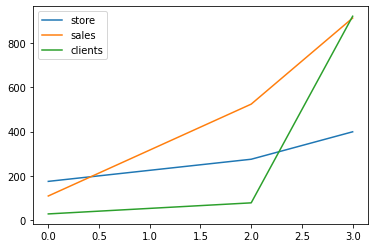

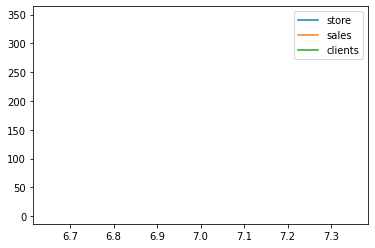

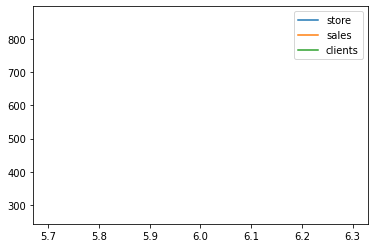

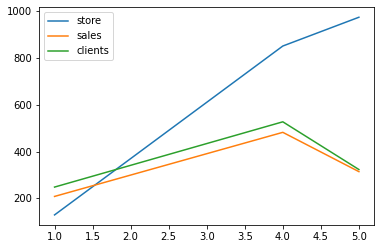

In [196]:
# Plot the groups
df.groupby('manager').plot()

In [197]:
df

,manager,store,sales,clients
0,Albert,175,109,28
1,Sharon,129,208,248
2,Albert,275,524,78
3,Albert,399,913,921
4,Sharon,851,482,527
5,Sharon,974,314,323
6,Pink,868,532,273
7,Angelina,4,31,347


In [198]:
df.loc[3:4, 'sales':'clients'] = np.nan

In [199]:
df.iloc[3:5, 2:4] 

,sales,clients
3,NaN,NaN
4,NaN,NaN


In [200]:
df

,manager,store,sales,clients
0,Albert,175,109.0,28.0
1,Sharon,129,208.0,248.0
2,Albert,275,524.0,78.0
3,Albert,399,NaN,NaN
4,Sharon,851,NaN,NaN
5,Sharon,974,314.0,323.0
6,Pink,868,532.0,273.0
7,Angelina,4,31.0,347.0


In [201]:
# Fill NA with group mean
df[['store','sales','clients']] = df.groupby('manager').transform(lambda x: x.fillna( x.mean() ) )

In [202]:
df

,manager,store,sales,clients
0,Albert,175,109.0,28.0
1,Sharon,129,208.0,248.0
2,Albert,275,524.0,78.0
3,Albert,399,316.5,53.0
4,Sharon,851,261.0,285.5
5,Sharon,974,314.0,323.0
6,Pink,868,532.0,273.0
7,Angelina,4,31.0,347.0


### Tabelas Mesclada com Groupby

In [203]:
data = [['CAMPO FORMOSO', '2021-08', 3720, 448.8],
        ['CAMPO FORMOSO', 'PO 2021-08', 3983, 433.7],
        ['SÃO MIGUEL DOS CAMPOS', '2021-08', 982, 425.9],
        ['SÃO MIGUEL DOS CAMPOS', 'PO 2021-08', 982, 425.9]]
    
columns = ['Fábrica', 'Data', 'Volume Dia Útil', 'Preço Bruto R$/t']

_df = pd.DataFrame( data=data, index=None, columns=columns, dtype=None, copy=False )

_df = _df.set_index(['Fábrica','Data'])

_df

Volume Dia Útil  Preço Bruto R$/t
Fábrica               Data                                         
CAMPO FORMOSO         2021-08                3720             448.8
                      PO 2021-08             3983             433.7
SÃO MIGUEL DOS CAMPOS 2021-08                 982             425.9
                      PO 2021-08              982             425.9

In [204]:
data = {'ano_mes': ['2021-08', '2021-09', '2021-10', '2021-11', '2021-12'], 'valor': [500, 100, 10, 1, 0] }
df = pd.DataFrame(data)
df

,ano_mes,valor
0,2021-08,500
1,2021-09,100
2,2021-10,10
3,2021-11,1
4,2021-12,0


In [205]:
df['ano_mes'].max()

'2021-12'

In [206]:
int(df['ano_mes'].max().split('-')[1])

12

In [207]:
last_month = f"{int(df['ano_mes'].max().split('-')[1])-1:02d}"
last_month

'11'

In [208]:
last_month = df['ano_mes'].max().split('-')[0] + '-' + last_month
last_month

'2021-11'

In [209]:

# # Select last date from historical data.
df = df[ df['ano_mes'] == last_month ].reset_index(drop=True)
df

,ano_mes,valor
0,2021-11,1


In [210]:
data = {'Aníversario':[1], 'Pós_nota':[5], ' Região':[2]}

_df = pd.DataFrame(data)
_df

,Aníversario,Pós_nota,Região
0,1,5,2


In [211]:
[col.lower() for col in _df.columns]

['aníversario', 'pós_nota', ' região']

In [212]:
_df.columns = _df.columns.str.replace('ã','a').str.replace('ú','u').str.replace('ó','o').str.replace('ç','c').str.replace('õ','o').str.replace('í','i').str.replace('á','a').str.replace('-','').str.replace('.', '').str.replace('/', '_').str.replace(' ', '_').str.replace('__', '_').str.strip().str.lower()
_df

C:\Users\ALEXSA~1.IGN\AppData\Local\Temp/ipykernel_8600/810925867.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  _df.columns = _df.columns.str.replace('ã','a').str.replace('ú','u').str.replace('ó','o').str.replace('ç','c').str.replace('õ','o').str.replace('í','i').str.replace('á','a').str.replace('-','').str.replace('.', '').str.replace('/', '_').str.replace(' ', '_').str.replace('__', '_').str.strip().str.lower()


,aniversario,pos_nota,_regiao
0,1,5,2


### Crosstab

In [213]:
data = {'content': ['Hulu',
                    'Hulu',
                    'Netflix',
                    'Hulu',
                    'Netflix',
                    'Netflix',
                    'Netflix',
                    'Netflix', 
                    'Hulu', 
                    'Hulu', 
                    'Netflix', 
                    'Netflix'],
            
            'sex': [ 'Male', 
                     'Male', 
                     'Male', 
                     'Male', 
                     'Female', 
                     'Female', 
                     'Male', 
                     'Female', 
                     'Female', 
                     'Female',
                     'Male',
                     'Female']}

In [214]:
crosstab = pd.DataFrame(data)
crosstab

,content,sex
0,Hulu,Male
1,Hulu,Male
2,Netflix,Male
3,Hulu,Male
4,Netflix,Female
5,Netflix,Female
6,Netflix,Male
7,Netflix,Female
8,Hulu,Female
9,Hulu,Female


In [215]:
pd.crosstab(crosstab['content'],crosstab['sex'])

sex,Female,Male
content,,
Hulu,2,3
Netflix,4,3


In [216]:
pd.crosstab(crosstab['content'],crosstab['sex'], normalize='all')

sex,Female,Male
content,,
Hulu,0.166667,0.25
Netflix,0.333333,0.25


* 2/12 = 0,1666  3/12 = 0,25
* 4/12 = 0,3333  3/12 = 0,25

In [217]:
pd.crosstab(crosstab['content'],crosstab['sex'], margins=True, normalize='columns')

sex,Female,Male,All
content,,,
Hulu,0.333333,0.5,0.416667
Netflix,0.666667,0.5,0.583333


* 2/6 = 0,3333  3/6 = 0,5000 | 0,833333 / 2 = 0.416667
* 4/6 = 0,6666  3/6 = 0,5000 | 1,166667 / 2 = 0.583333

In [218]:
pd.crosstab(crosstab['content'],crosstab['sex'], margins=True, normalize='index')

sex,Female,Male
content,,
Hulu,0.400000,0.600000
Netflix,0.571429,0.428571
All,0.500000,0.500000


* 2/6 = 0,400000  3/6 = 0,600000 
* 4/6 = 0,571429  3/6 = 0,428571
* 1/2 = 0,500000  1/2 = 0,500000

In [219]:
pd.crosstab(crosstab['content'],crosstab['sex'], margins=True, normalize='all')

sex,Female,Male,All
content,,,
Hulu,0.166667,0.25,0.416667
Netflix,0.333333,0.25,0.583333
All,0.500000,0.50,1.000000


In [220]:
pd.crosstab(crosstab['content'],crosstab['sex'], margins=False, normalize='all')

sex,Female,Male
content,,
Hulu,0.166667,0.25
Netflix,0.333333,0.25


In [221]:
pd.crosstab(crosstab['content'],crosstab['sex'], margins=True)

sex,Female,Male,All
content,,,
Hulu,2,3,5
Netflix,4,3,7
All,6,6,12


### Teste uma coluna

In [222]:
data = {'teste':[1,2,3,4,5]}
_df = pd.DataFrame(data)
_df

,teste
0,1
1,2
2,3
3,4
4,5


In [223]:
_df.loc[0]

teste    1
Name: 0, dtype: int64

In [224]:
data = {'a':[1,2], 'b':[1,2] , 'c':[1,2] , 'd':[1,2]}
_df = pd.DataFrame(data)
_df

,a,b,c,d
0,1,1,1,1
1,2,2,2,2


In [225]:
for i in range(len(_df.columns)) :
    _name = _df.columns[i] + '_r$_ton'
    _df[ _name ] = 0
_df

,a,b,c,d,a_r$_ton,b_r$_ton,c_r$_ton,d_r$_ton
0,1,1,1,1,0,0,0,0
1,2,2,2,2,0,0,0,0


In [226]:
import re
def clean_strings(strings):
    result = []
    for value in strings:
        value = value.strip()
        value = re.sub('[!#?.0123456789]', '', value)
        value = value.lower()
        result.append(value)
    return result

In [227]:
_list = ['#ksjd', 'rua. ']
_list

['#ksjd', 'rua. ']

In [228]:
clean_strings(_list)

['ksjd', 'rua']

In [229]:
data = {'Canal12':[1], 'Gte.':[1], }
_df = pd.DataFrame(data)
_df

,Canal12,Gte.
0,1,1


In [230]:
_df.columns = clean_strings(_df.columns.to_list())
_df

,canal,gte
0,1,1


In [231]:
def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

In [232]:

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result

In [233]:
# list text
states = [' Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda','south carolina##', 'West virginia?']

In [234]:
# list of operatios
clean_ops = [str.strip, remove_punctuation, str.title]

In [235]:
clean_strings(states, clean_ops)

['Alabama',
 'Georgia',
 'Georgia',
 'Georgia',
 'Florida',
 'South Carolina',
 'West Virginia']

In [236]:
for x in map(remove_punctuation, states):
    print(x)

 Alabama 
Georgia
Georgia
georgia
FlOrIda
south carolina
West virginia


In [237]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]

ints = [4, 0, 1, 5, 6]
apply_to_list(ints, lambda x: x * 2)    

[8, 0, 2, 10, 12]

In [238]:
def _fn(date_proj: str = None, previous_year = False) -> str:
    """
    Take a date ex:2022-02 split in - and bring year or last year.
    """

    if isinstance(date_proj, str): 
        _data_proj = int(date_proj.split('-')[0])
    elif isinstance(date_proj, int): 
        _data_proj = int(date_proj)
    else:
        raise TypeError("Function do not acepts this scalar type")

    if previous_year & int(date_proj.split('-')[1]) == 1 : 
        result = str(int(_data_proj) - 1)
    else: result = _data_proj

    return str(result)

In [239]:
_fn(date_proj = '2022-012', previous_year = True)

'2022'

In [240]:
data = {'fabrica':['a','Cluster'], 'periodo':[1,2]}

_df = pd.DataFrame(data)

_df['periodo'] = np.where(_df['fabrica'].str.contains('Cluster', regex=False), ' ', _df['periodo'])

In [241]:
_df

,fabrica,periodo
0,a,1
1,Cluster,


### numerando colunas por linha

In [242]:
_df.loc['cols'] = list(range(0, _df.shape[1]))
_df

,fabrica,periodo
0,a,1
1,Cluster,
cols,0,1


In [243]:
data = {'fabrica':['fab_a','fab_b', 'fab_c'], 'periodo':[1,2,3]}

_df = pd.DataFrame(data)
_df

,fabrica,periodo
0,fab_a,1
1,fab_b,2
2,fab_c,3


#### Exemplo de drop level  

In [244]:
# _df = pd.pivot_table(_data_pt, values=['frete_total_r$_ton'], index=['fabrica'], columns=['incoterms'], aggfunc='sum', fill_value=0, margins=False, dropna=True, margins_name='All', observed=False)

# _df = _df.reset_index()

# _df.columns = _df.columns.droplevel(0)
# _df.columns.name = ''
# _df.columns = [ 'fabrica', 'frete_cif' , 'frete_fob' ]

In [245]:
# Concatenando levels de columns

# _cols = _df.columns.get_level_values(0) + '_' + _df.columns.get_level_values(1)
# _df.columns = _df.columns.droplevel(0)
# _df.columns.name = ''
# _df.columns = _cols



#### list comprehension com for com zip ()

In [246]:
_key_list = ['fabrica', 'expedicao', 'regiao', 'estado', 'micro_regiao', 'canal', 'embalagem', 'incoterms', 'frete_total_r$_ton_2022-01', 'frete_total_r$_ton_2022-02', 'preco_fob_c_incentivo_2022-01', 'preco_fob_c_incentivo_2022-02', 'preco_fob_s_incentivo_2022-01', 'preco_fob_s_incentivo_2022-02', 'quant_tonelada_2022-01', 'quant_tonelada_2022-02', 'receita_fob_c_incentivo_2022-01', 'receita_fob_c_incentivo_2022-02', 'receita_fob_s_incentivo_2022-01', 'receita_fob_s_incentivo_2022-02', 'volume_dia_util_2022-01', 'volume_dia_util_2022-02']
_values_list = ['APIAÍ', 'B101', 'SUDESTE', 'São Paulo', 'SP_Araraquara', 'Concreteira', 'Granel', 'FOB', 0.018280123583934087, 0.0005060728744939271, 334.9303810504634, 328.20217611335994, 334.9303810504634, 328.20217611335994, 38.84, 39.52, 13008.695999999998, 12970.549999999987, 13008.695999999998, 12970.549999999987, 1.6886957, 1.8819048]
_data = { value1:[value2]  for value1, value2 in zip(_key_list, _values_list) }

_data

{'fabrica': ['APIAÍ'],
 'expedicao': ['B101'],
 'regiao': ['SUDESTE'],
 'estado': ['São Paulo'],
 'micro_regiao': ['SP_Araraquara'],
 'canal': ['Concreteira'],
 'embalagem': ['Granel'],
 'incoterms': ['FOB'],
 'frete_total_r$_ton_2022-01': [0.018280123583934087],
 'frete_total_r$_ton_2022-02': [0.0005060728744939271],
 'preco_fob_c_incentivo_2022-01': [334.9303810504634],
 'preco_fob_c_incentivo_2022-02': [328.20217611335994],
 'preco_fob_s_incentivo_2022-01': [334.9303810504634],
 'preco_fob_s_incentivo_2022-02': [328.20217611335994],
 'quant_tonelada_2022-01': [38.84],
 'quant_tonelada_2022-02': [39.52],
 'receita_fob_c_incentivo_2022-01': [13008.695999999998],
 'receita_fob_c_incentivo_2022-02': [12970.549999999987],
 'receita_fob_s_incentivo_2022-01': [13008.695999999998],
 'receita_fob_s_incentivo_2022-02': [12970.549999999987],
 'volume_dia_util_2022-01': [1.6886957],
 'volume_dia_util_2022-02': [1.8819048]}

#### Com For Nested(aninhado)

In [247]:
dict_from_list = {}
for key in _key_list:
  for value in _values_list:
    dict_from_list[key] = value
    _values_list.remove(value)
    break

print(dict_from_list)

{'fabrica': 'APIAÍ', 'expedicao': 'B101', 'regiao': 'SUDESTE', 'estado': 'São Paulo', 'micro_regiao': 'SP_Araraquara', 'canal': 'Concreteira', 'embalagem': 'Granel', 'incoterms': 'FOB', 'frete_total_r$_ton_2022-01': 0.018280123583934087, 'frete_total_r$_ton_2022-02': 0.0005060728744939271, 'preco_fob_c_incentivo_2022-01': 334.9303810504634, 'preco_fob_c_incentivo_2022-02': 328.20217611335994, 'preco_fob_s_incentivo_2022-01': 334.9303810504634, 'preco_fob_s_incentivo_2022-02': 328.20217611335994, 'quant_tonelada_2022-01': 38.84, 'quant_tonelada_2022-02': 39.52, 'receita_fob_c_incentivo_2022-01': 13008.695999999998, 'receita_fob_c_incentivo_2022-02': 12970.549999999987, 'receita_fob_s_incentivo_2022-01': 13008.695999999998, 'receita_fob_s_incentivo_2022-02': 12970.549999999987, 'volume_dia_util_2022-01': 1.6886957, 'volume_dia_util_2022-02': 1.8819048}


In [248]:
_key_list = ['fabrica', 'expedicao', 'regiao', 'estado', 'micro_regiao', 'canal', 'embalagem', 'incoterms', 'frete_total_r$_ton_2022-01', 'frete_total_r$_ton_2022-02', 'preco_fob_c_incentivo_2022-01', 'preco_fob_c_incentivo_2022-02', 'preco_fob_s_incentivo_2022-01', 'preco_fob_s_incentivo_2022-02', 'quant_tonelada_2022-01', 'quant_tonelada_2022-02', 'receita_fob_c_incentivo_2022-01', 'receita_fob_c_incentivo_2022-02', 'receita_fob_s_incentivo_2022-01', 'receita_fob_s_incentivo_2022-02', 'volume_dia_util_2022-01', 'volume_dia_util_2022-02']
_values_list = ['APIAÍ', 'B101', 'SUDESTE', 'São Paulo', 'SP_Araraquara', 'Concreteira', 'Granel', 'FOB', 0.018280123583934087, 0.0005060728744939271, 334.9303810504634, 328.20217611335994, 334.9303810504634, 328.20217611335994, 38.84, 39.52, 13008.695999999998, 12970.549999999987, 13008.695999999998, 12970.549999999987, 1.6886957, 1.8819048]


#### Com Range

In [249]:
dict_from_list = {}
for i in range(len(_key_list)):
  dict_from_list[_key_list[i]] = _values_list[i]

print(dict_from_list)

{'fabrica': 'APIAÍ', 'expedicao': 'B101', 'regiao': 'SUDESTE', 'estado': 'São Paulo', 'micro_regiao': 'SP_Araraquara', 'canal': 'Concreteira', 'embalagem': 'Granel', 'incoterms': 'FOB', 'frete_total_r$_ton_2022-01': 0.018280123583934087, 'frete_total_r$_ton_2022-02': 0.0005060728744939271, 'preco_fob_c_incentivo_2022-01': 334.9303810504634, 'preco_fob_c_incentivo_2022-02': 328.20217611335994, 'preco_fob_s_incentivo_2022-01': 334.9303810504634, 'preco_fob_s_incentivo_2022-02': 328.20217611335994, 'quant_tonelada_2022-01': 38.84, 'quant_tonelada_2022-02': 39.52, 'receita_fob_c_incentivo_2022-01': 13008.695999999998, 'receita_fob_c_incentivo_2022-02': 12970.549999999987, 'receita_fob_s_incentivo_2022-01': 13008.695999999998, 'receita_fob_s_incentivo_2022-02': 12970.549999999987, 'volume_dia_util_2022-01': 1.6886957, 'volume_dia_util_2022-02': 1.8819048}


#### com dict e zip functions

In [250]:
dict_from_list = dict(zip(_key_list, _values_list))
print(dict_from_list)

{'fabrica': 'APIAÍ', 'expedicao': 'B101', 'regiao': 'SUDESTE', 'estado': 'São Paulo', 'micro_regiao': 'SP_Araraquara', 'canal': 'Concreteira', 'embalagem': 'Granel', 'incoterms': 'FOB', 'frete_total_r$_ton_2022-01': 0.018280123583934087, 'frete_total_r$_ton_2022-02': 0.0005060728744939271, 'preco_fob_c_incentivo_2022-01': 334.9303810504634, 'preco_fob_c_incentivo_2022-02': 328.20217611335994, 'preco_fob_s_incentivo_2022-01': 334.9303810504634, 'preco_fob_s_incentivo_2022-02': 328.20217611335994, 'quant_tonelada_2022-01': 38.84, 'quant_tonelada_2022-02': 39.52, 'receita_fob_c_incentivo_2022-01': 13008.695999999998, 'receita_fob_c_incentivo_2022-02': 12970.549999999987, 'receita_fob_s_incentivo_2022-01': 13008.695999999998, 'receita_fob_s_incentivo_2022-02': 12970.549999999987, 'volume_dia_util_2022-01': 1.6886957, 'volume_dia_util_2022-02': 1.8819048}


In [251]:
_df = pd.DataFrame(_data)
_df 

,fabrica,expedicao,regiao,estado,micro_regiao,...,receita_fob_c_incentivo_2022-02,receita_fob_s_incentivo_2022-01,receita_fob_s_incentivo_2022-02,volume_dia_util_2022-01,volume_dia_util_2022-02
0,APIAÍ,B101,SUDESTE,São Paulo,SP_Araraquara,...,12970.55,13008.696,12970.55,1.688696,1.881905


In [252]:
[ i[0] for i in enumerate(_df.columns.tolist()) ]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

In [253]:
{ i[0]:i[1] for i in enumerate(_df.columns.tolist()) }

{0: 'fabrica',
 1: 'expedicao',
 2: 'regiao',
 3: 'estado',
 4: 'micro_regiao',
 5: 'canal',
 6: 'embalagem',
 7: 'incoterms',
 8: 'frete_total_r$_ton_2022-01',
 9: 'frete_total_r$_ton_2022-02',
 10: 'preco_fob_c_incentivo_2022-01',
 11: 'preco_fob_c_incentivo_2022-02',
 12: 'preco_fob_s_incentivo_2022-01',
 13: 'preco_fob_s_incentivo_2022-02',
 14: 'quant_tonelada_2022-01',
 15: 'quant_tonelada_2022-02',
 16: 'receita_fob_c_incentivo_2022-01',
 17: 'receita_fob_c_incentivo_2022-02',
 18: 'receita_fob_s_incentivo_2022-01',
 19: 'receita_fob_s_incentivo_2022-02',
 20: 'volume_dia_util_2022-01',
 21: 'volume_dia_util_2022-02'}

#### Style

In [254]:
color = {
    'white':'#FFFFFF',
    'gray': '#AAA9AD',
    'black':'#313639',
    'purple':'#AD688E',
    'orange':'#D18F77',
    'yellow':'#E8E190',
    'ltgreen':'#CCD9C7',
    'dkgreen':'#96ABA0',
    'red':'#FF0000'
    }

_columns = ['Atalhos','Ações']
_values = [
          ['Shift + Click', 'Shift + area', 'Delete', 'Ctrl + ←', 'Ctrl + →', 'Ctrl + down', 'Ctrl + up', 'Ctrl + F', 'Ctrl + S', 'Ctrl + H', 'Ctrl + R', 'Ctrl + Y', 'Ctrl + Click', 'Ctrl + space', 'Ctrl + B', 'Ctrl + C', 'Ctrl + X', 'Ctrl + V', 'Ctrl + M', 'Ctrl + D', 'Ctrl + G', 'Ctrl + I', 'Ctrl + Alt + 0', 'Ctrl + Enter', 'Ctrl + E', 'Ctrl + A', 'Ctrl + Alt + O', 'Ctrl + Alt + I', 'Ctrl + Alt + D', 'Mouse Wheel', 'Alt + Mouse Wheel', 'Ctrl + Mouse Wheel', 'Ctrl + Shift +H', 'Ctrl + Q', 'Ctrl + Shift + C', 'Ctrl + F (in dock)', 'Ctrl + 1 (in dock)', 'Ctrl + 2 (in dock)', 'Ctrl + 3 (in dock)'
],        ['Select node', 'Select node area', 'Delete node', 'Align left', 'Align right', 'Align bottom edge', 'Align top edge', 'Search node', 'Save current model', 'From a selected alias node go to the original', 'Evaluate node', 'Alternated displaying nodes Title / ID', 'Insert node Id in other node definition', 'Autofill formulas', 'Edit node number format', 'Copy node', 'Cut node', 'Paste node', 'Create alias', 'Duplicate node', 'Same height', 'Same width', 'Same size', 'Evaluate node and show console output', 'Evaluate and Explore node properties', 'Select all items from PivotGrid and influence diagram', 'New output', 'New input', 'Go to influence diagram', 'Move the diagram up/down', 'Move the diagram left/right', 'Increase/reduce node size', 'Go back to the last level when navigating the modules in the diagram', 'Go one level up', 'Copy PivotGrid with format', 'Search/ change key', 'Move to properties window', 'Move to code window', 'Move to docs window'
          ]
          ]
_data = {_columns[0]:_values[0], _columns[1]:_values[1]}

_df = pd.DataFrame( data=_data, index=None, columns=None, dtype=None, copy=False )

# _df = _df.style.background_gradient(cmap="#D10F77")
_df = _df.style.set_properties(**{'background-color': '#3DB3FF', 
                                   'align':'center',
                                   'text-align': 'center',
                                   'color': 'white',                       
                                   'border-color': 'white',
                                   'border-style': 'solid',
                                   'border-width': '1px'
    
})

_df

,Atalhos,Ações
0,Shift + Click,Select node
1,Shift + area,Select node area
2,Delete,Delete node
3,Ctrl + ←,Align left
4,Ctrl + →,Align right
5,Ctrl + down,Align bottom edge
6,Ctrl + up,Align top edge
7,Ctrl + F,Search node
8,Ctrl + S,Save current model
9,Ctrl + H,From a selected alias node go to the original


In [255]:
_df = _df.set_table_styles([dict(selector='th', props=[('text-align', 'center'), ('background-color','#E5E5E5'), ('border-color','white'), ('border-style','solid'), ('border-width','1px')] )])

_df

,Atalhos,Ações
0,Shift + Click,Select node
1,Shift + area,Select node area
2,Delete,Delete node
3,Ctrl + ←,Align left
4,Ctrl + →,Align right
5,Ctrl + down,Align bottom edge
6,Ctrl + up,Align top edge
7,Ctrl + F,Search node
8,Ctrl + S,Save current model
9,Ctrl + H,From a selected alias node go to the original


#### Filter list

In [256]:
all_versions = ['BE 2 | 25-05-2022 12:34:10', 'RF 1 | 24-05-2022 15:07:12', 'BE | 25-05-2022 11:51:38', 'PO 2 | 25-05-2022 10:42:25', 'PO | 24-05-2022 16:17:59']

_filter = list(filter(lambda x: 'RF' in x, all_versions))
_list_comprehension = [ver for ver in all_versions if 'BE' in ver]

result =  _filter
result

['RF 1 | 24-05-2022 15:07:12']

In [257]:
for i in range(1,147):
    print(f"75, ",  end="")

75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 

In [258]:
#Data Treatement
# _df = _df.fillna(0.)

# _df = _df.rename(columns={'Código Unidade': 'cod_unidades', 'Equipamentos':'equipamentos'})

# _cols = [i for i in _df.columns if i != 'None']
# _df = _df[_cols]

# _cols_index = ['cod_unidades', 'equipamentos']
# _cols_ind_dict = {'cod_unidades':'str', 'equipamentos':'str'}

# _df[_cols_index] = _df[_cols_index].astype(_cols_ind_dict)

# _cols = [_col for _col in _df.columns if _col not in _cols_index]
# _df[_cols] = _df[_cols].astype(int)

# # for i in range(2, len(_cols)):
# #     _df[_cols[i]].astype('float')

# result = _df.dtypes

In [259]:
_columns = ['fabrica', 'data', 'volumes']
_values = [['api', 'bdq'],['2022-06','2022-07'], [350,450] ]
_data = dict(zip(_columns, _values))
_data


{'fabrica': ['api', 'bdq'],
 'data': ['2022-06', '2022-07'],
 'volumes': [350, 450]}

In [260]:
_df = pd.DataFrame(_data)
_df

,fabrica,data,volumes
0,api,2022-06,350
1,bdq,2022-07,450


In [261]:
_df['data'].max()

'2022-07'

In [262]:
# Select max date from historical data.
max_date = _df[_df['data'] ==_df['data'].max()].reset_index(drop=True)
max_date


,fabrica,data,volumes
0,bdq,2022-07,450


In [263]:
_df['data'].min()

'2022-06'

In [264]:
# Select min date from historical data.
min_date = _df[_df['data']==_df['data'].min()].reset_index(drop=True)
# result = _df['data'].min()
min_date

,fabrica,data,volumes
0,api,2022-06,350


In [265]:
_cols = [i for i in _df.columns if i != 'None']
_df = _df[_cols]

* tratamento de leitura     

In [266]:
_file = 'Input Dias Uteis por Semana.xlsx'
_sheet = 'Dias Uteis por Semana'

_ref = refresh_hist_inputs  
 
_excel_con = pp.excel_connection(os.path.join(inputs_folder_name, _file))

_df = pp.pandas_from_excel( _excel_con, sheetName=_sheet, namedRange=None, cellRange=None, indexes=None, driver='')

#Data Treatement
_df = _df.fillna(0.)

_df = _df.rename(columns={'Código Unidade': 'cod_unidades', 'Equipamentos':'equipamentos'})

_cols = [i for i in _df.columns if i != 'None']
_df = _df[_cols]

_cols_index = ['cod_unidades', 'equipamentos']
_cols_ind_dict = {'cod_unidades':'str', 'equipamentos':'str'}

_df[_cols_index] = _df[_cols_index].astype(_cols_ind_dict)

_cols = [_col for _col in _df.columns if _col not in _cols_index]
_df[_cols] = _df[_cols].astype(int)

result = _df

NameError: name 'refresh_hist_inputs' is not defined

In [ ]:
fabrica_be = ['APIAÍ', 'BODOQUENA', 'CAJATI', 'CAMPO FORMOSO', 'CANDIOTA', 'CEZARINA',
       'IJACI', 'JOÃO PESSOA', 'NOVA SANTA RITA', 'PEDRO LEOPOLDO',
       'SANTANA DO PARAÍSO', 'sÃO MIGUEL DOS CAMPOS']
fabrica_oferta_vol = ['APIAÍ', 'BODOQUENA', 'CAMPO FORMOSO', 'CAJATI', 'CANDIOTA', 'CEZARINA',
       'IJACI', 'NOVA SANTA RITA', 'SÃO MIGUEL DOS CAMPOS',
       'SANTANA DO PARAÍSO']

_data = [fabrica_be, fabrica_oferta_vol]
_cols = ['fab_be','fab_oferta']

_df = pd.DataFrame( data=_data, index=None, columns=None, dtype=None, copy=False )
_df = _df.T
_df.columns = _cols
_df = _df.sort_values('fab_be', na_position='first')


_df


,fab_be,fab_oferta
0,APIAÍ,APIAÍ
1,BODOQUENA,BODOQUENA
2,CAJATI,CAMPO FORMOSO
3,CAMPO FORMOSO,CAJATI
4,CANDIOTA,CANDIOTA
5,CEZARINA,CEZARINA
6,IJACI,IJACI
7,JOÃO PESSOA,NOVA SANTA RITA
8,NOVA SANTA RITA,SÃO MIGUEL DOS CAMPOS
9,PEDRO LEOPOLDO,SANTANA DO PARAÍSO


In [ ]:
_df['fab_be'].astype(str).str[:2]

0     AP
1     BO
2     CA
3     CA
4     CA
5     CE
6     IJ
7     JO
8     NO
9     PE
10    SA
11    sÃ
Name: fab_be, dtype: object

* Seleciona versão

In [ ]:

all_versions = ['RF | 2022-07 | 15-07-2022 13:50:32', 'BE | 2022-07 | 15-07-2022 13:50:32', 'PT | 2022-07 | 15-07-2022 13:50:32' ]

_version = [ver for ver in all_versions if 'RF' in ver]
# result = pp.selector(_version,0,False)
_version


['RF | 2022-07 | 15-07-2022 13:50:32']

In [267]:
df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})
df['date'] = pd.to_datetime(df['date'], format="%Y-%d-%m %H:%M:%S")
df

,date,value
0,2016-10-06 20:30:00,2
1,2016-01-07 19:45:30,3
2,2013-12-10 04:05:01,4


In [3]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()
 
print("now =", now)

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("date and time =", dt_string)

now = 2022-09-15 19:07:44.416188
date and time = 15/09/2022 19:07:44


In [10]:
_df = pd.DataFrame({'date': ['2016-6-10 20:30:0', 
                            '2016-7-1 19:45:30', 
                            '2013-10-12 4:5:1'],
                   'value': [2, 3, 4]})
_df

,date,value
0,2016-6-10 20:30:0,2
1,2016-7-1 19:45:30,3
2,2013-10-12 4:5:1,4


In [11]:
_df.insert(2, "data",  pd.to_datetime(_df['date'], format="%Y-%m").dt.strftime('%Y-%m'))
_df

,date,value,data
0,2016-6-10 20:30:0,2,2016-06
1,2016-7-1 19:45:30,3,2016-07
2,2013-10-12 4:5:1,4,2013-10


Criando datas

In [ ]:
# _time = (pd.date_range('2022-01', periods=12, freq='M')).astype(str).str[:7]

_time = pp.create_time( '2022-01', '2022-12', freq='M', format='%Y-%m' )

result = pd.Index(_time)